# Diego Jafet Garza Segovia

Dentro de este proyecto, se estara trabajando con una base de datos de imágenes del MNIST, el cual contiene imageses de los numeros del 0 al 9 con un tamaño de 28x28 pixeles.

Se entrenara un modelo de redes neuronales para clasificar estos dígitos (del 0 al 9), y se mostrara mediante gráficas el comportamiento del sistema a lo largo del entrenamiento.

Despues, se especificara la exactitud del modelo tanto en entrenamiento como en validación.

Primero, se deberan importar las bibliotecas necesarias para importar la base de datos, y luego se verificaran las dimensiones de los datos y la proporcion de clases.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)



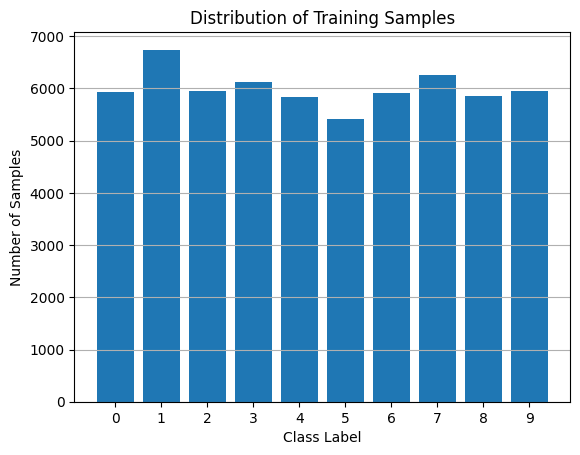

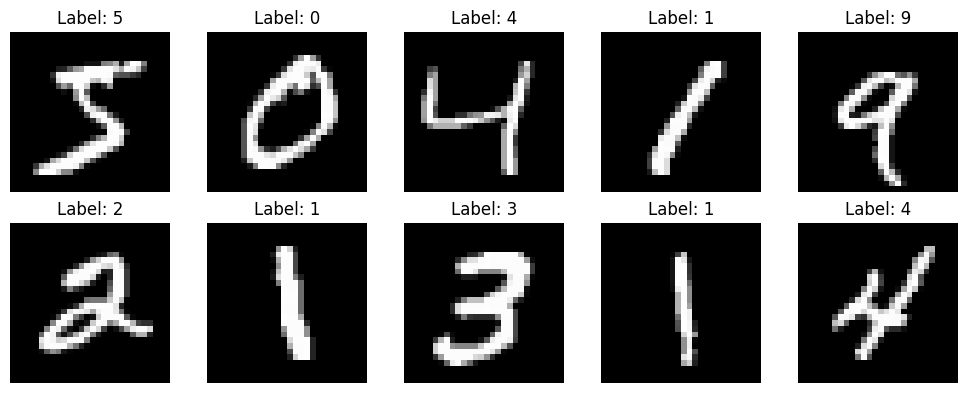



Min pixel value in training set: 0
Max pixel value in training set: 255


In [5]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Import dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the shape of data
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}\n")

# Check class proportions
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribution of Training Samples')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()
print("\n")

# Plotting first few images from the training set
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off') # Turn off axis numbers
plt.tight_layout()
plt.show()
print("\n")

# Range of the data
print(f"Min pixel value in training set: {train_images.min()}")
print(f"Max pixel value in training set: {train_images.max()}")

Tras confirmar que se importo adecuadamente la base de datos, y que hay una distribucion relativamente balanceada de las clases, ahora visualizaremos algunas de las imagenes y sus tags (labels).

Se puede ver que las imagenes se componen de recuadros negros con trazos blancos de los numeros relativamente delgados, y casi binarizados por completo (en blanco y negro).

Adicionalmente podemos ver que el valor minimo de los pixeles (en el set de entrenamiento) es de 0, y el maximo es de 255.

La arquitectura de el modelo (utilizando tensorflow) sera compuesta por 4 capas (sin incluir la capa de entrada).
Las primeras 3 capas tendran 512, 256 y 128 valores respectivamente y tendran una activacion relu para disminuir el tiempo de procesamiento.
La ultima capa unicamente tendra 10 parametros, representando los numeros del 0 al 9, y con activacion softmax para que la suma de sus probabilidades sea 1.
La capa de entrada, tendra 784 valores de entrada, ya que es el "flatten" de valores con dimensiones de 28x28.

Se aplicara un learning rate de 0.001 para asegurarnos de que el modelo aprenda bien los patrones, pero a la vez no se tarde tanto durante el entrenamiento (misma razon por la que se eligio utilizar Adam).

In [6]:
# Import keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create simple feedforward neural network
model = Sequential()

# Recommended way to define input shape
model.add(Input(shape=(28, 28)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Specify optimizer
opt = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Una vez creada la arquitectura del modelo, viendo su resumen podemos ver que contiene un total de 567,434 parametros.

Para evitar que el entrenamiento sea muy tardado, se aplicara un early stopping callback, con una paciencia de 10 epocas, pero en si el modelo contara con un total de 10 epocas.

Si hace un early stopping, se regresara a la mejor epoca. Adicionalmente, el modelo manejara batches de 32 para acelerar el entrenamiento.

Luego, se graficaran la exactitud y loss del entrenamiento y validacion.

In [7]:
# Create early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.4, batch_size=32, callbacks=[early_stop])


Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8231 - loss: 4.1912 - val_accuracy: 0.9156 - val_loss: 0.3517
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9439 - loss: 0.2070 - val_accuracy: 0.9418 - val_loss: 0.2391
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9549 - loss: 0.1598 - val_accuracy: 0.9503 - val_loss: 0.1877
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9628 - loss: 0.1339 - val_accuracy: 0.9432 - val_loss: 0.2433
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9657 - loss: 0.1236 - val_accuracy: 0.9542 - val_loss: 0.1881
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9693 - loss: 0.1106 - val_accuracy: 0.9592 - val_loss: 0.1846
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9668 - loss: 0.1202 - val_accuracy: 0.9570 - val_loss: 0.1692
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9781 - loss: 0.0782 -

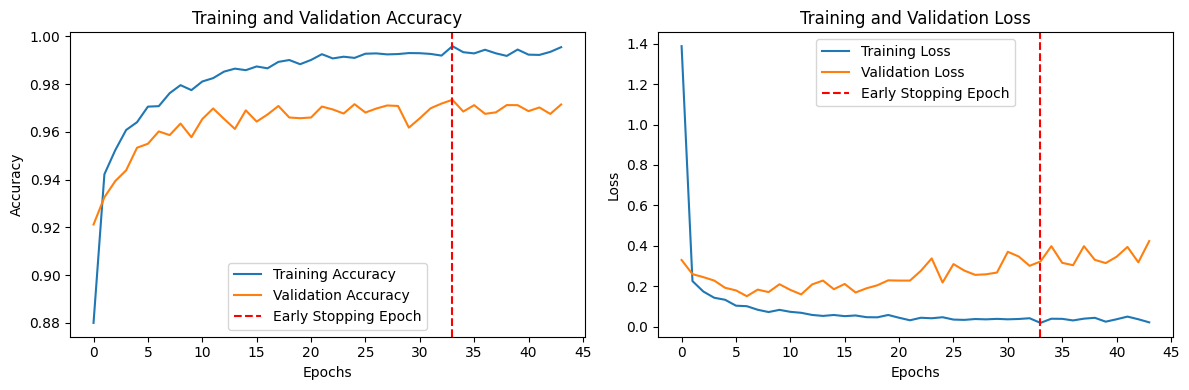

In [ ]:
from matplotlib.ticker import MaxNLocator
stopped_epoch = early_stop.stopped_epoch
best_epoch = stopped_epoch - early_stop.patience
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # Ensure integer values on x-axis
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # Ensure integer values on x-axis
plt.legend()
plt.tight_layout()
plt.show()


En ambas graficas, se puede ver que el modelo rapidamente mejoro tras pocas epocas, y que su mejor epica fue en la epoca 33.

A pesar de que en las graficas parece haber una gran diferencia entre el entrenamiento y la validacion (indicando un sobreajuste), esto es un efecto visual debido a los parametros mostrados en el Accuracy. En realidad, existe una diferencia aproximada de 0.02 entre el training y validacion, por lo que se puede decir que el modelo NO tiene sobreajuste.

Adicionalmente, se puede ver que, para la validacion, el accuracy es aproximadamente 0.96 y el loss de 0.4, los cuales son valores optimos y que nos pueden indicar que el modelo deberia de poder funcionar con otros numeros de prueba.

Para verificar esto, se medira el accuracy y loss con el set de prueba.

In [ ]:
# === Step 2: Evaluate model on the test set ===
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Compare with validation accuracy from training
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Test Accuracy: 0.9750
Test Loss: 0.3069
Best Validation Accuracy: 0.9734


El accuracy subio a un 0.975, mostrando que se puede adaptar bien a otras imagenes y que no tiene sobre ajuste, y con un loss de 0.3.

Esto nos puede decir que la arquitectura del modelo fue adecuada para su entrenamiento, aunque hasta el momento todas las imagenes utilizadas han sido de MNIST con un formato casi identico (fondo negro, trazos delgados blancos, etc).

Para probar su funcionamiento con imagenes tomadas de la vida real (o simplemente de otro estilo), se generaran 5 imagenes regulares de cada digito, y una imagen adicional con un fondo con mas ruido para ver su comportamiento.

Aunque las imagenes ya seran de un tamaño de 28x28, estas se importaran y se preprocesaran para que sean de un estilo similar a las de MNIST. Seran transformadas a una escala de grises para posteriormente ser binarizadas a blanco y negro mediante un threshold particular, y se invertiran los pesos (los pixeles negros y blancos se voltearan)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directorio seleccionado:
/content/drive/MyDrive/ITC 5to Semestre/Inteligencia Artificial/Numeros A3.2

Archivo: 0_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12340
  1   |   0.08969
  2   |   0.09740
  3   |   0.07996
  4   |   0.09730
  5   |   0.08266
  6   |   0.08042
  7   |   0.05104
  8   |   0.19168
  9   |   0.10644


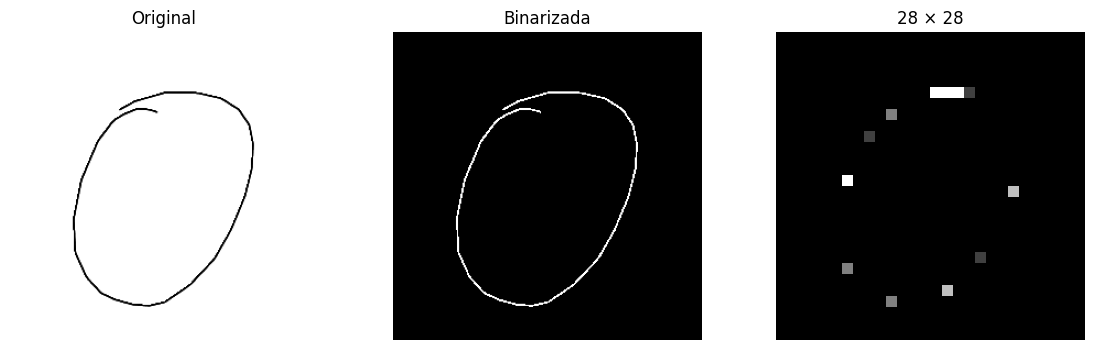


Archivo: 0_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12312
  1   |   0.09165
  2   |   0.09903
  3   |   0.07972
  4   |   0.09931
  5   |   0.08200
  6   |   0.07701
  7   |   0.05260
  8   |   0.18930
  9   |   0.10626


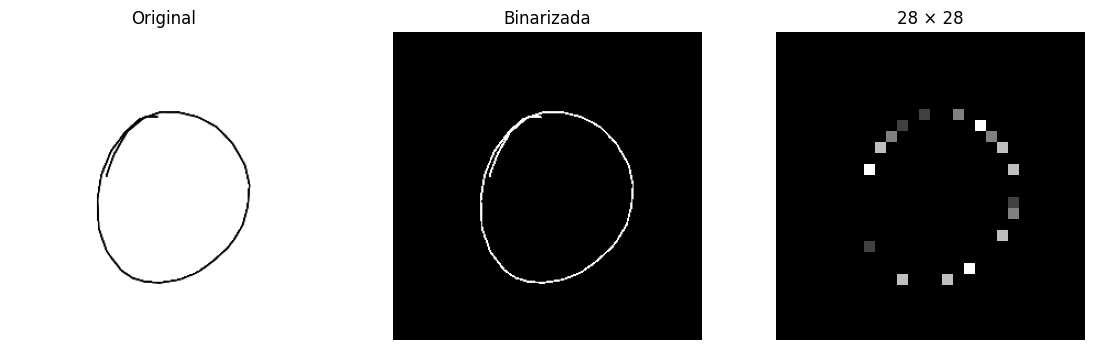


Archivo: 0_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12404
  1   |   0.09095
  2   |   0.09928
  3   |   0.07914
  4   |   0.09902
  5   |   0.08116
  6   |   0.08102
  7   |   0.05160
  8   |   0.18936
  9   |   0.10442


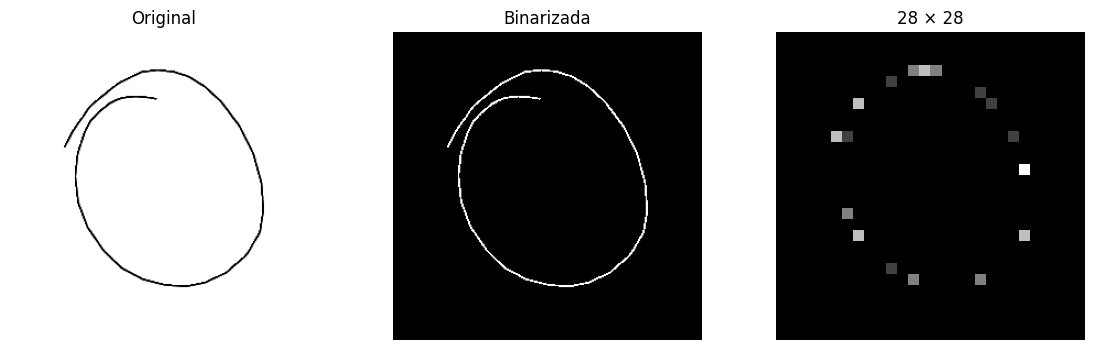


Archivo: 0_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12391
  1   |   0.09025
  2   |   0.09831
  3   |   0.07868
  4   |   0.09870
  5   |   0.08124
  6   |   0.07970
  7   |   0.05139
  8   |   0.19130
  9   |   0.10652


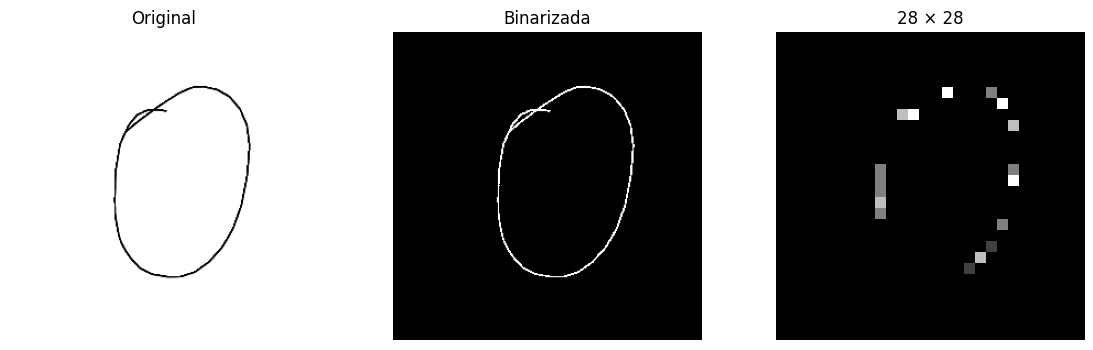


Archivo: 0_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12399
  1   |   0.09050
  2   |   0.09899
  3   |   0.07913
  4   |   0.09813
  5   |   0.08118
  6   |   0.08116
  7   |   0.05134
  8   |   0.19045
  9   |   0.10513


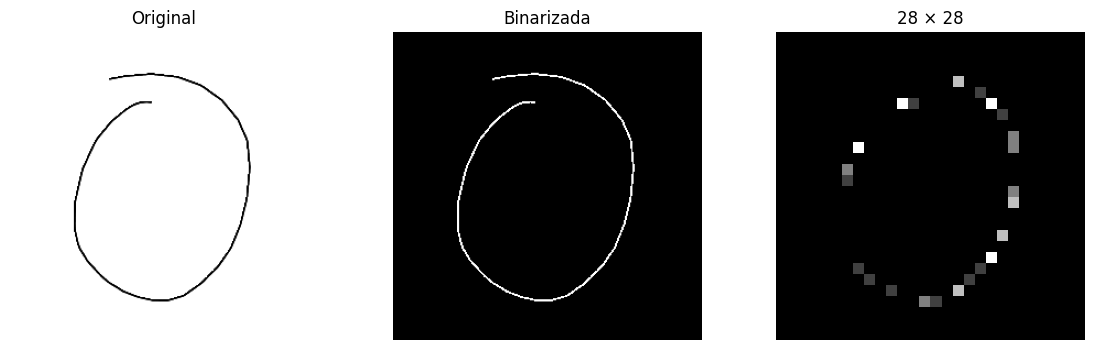


Archivo: 0_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


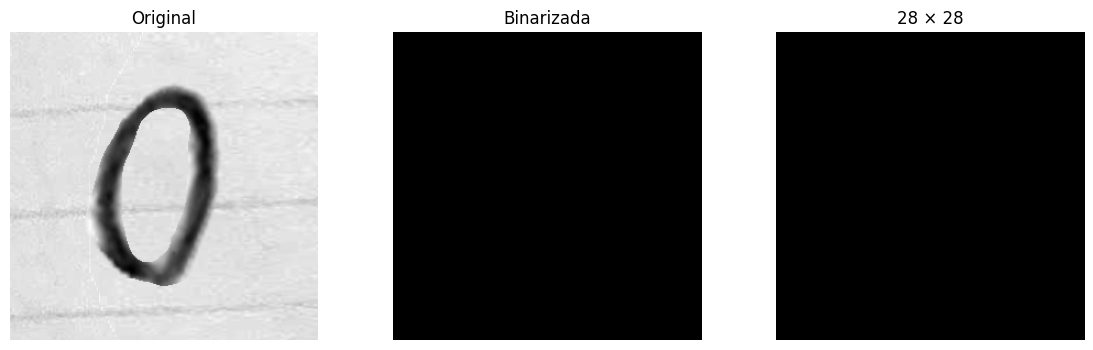


Archivo: 1_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12401
  1   |   0.09055
  2   |   0.09898
  3   |   0.07911
  4   |   0.09826
  5   |   0.08121
  6   |   0.08115
  7   |   0.05137
  8   |   0.19026
  9   |   0.10510


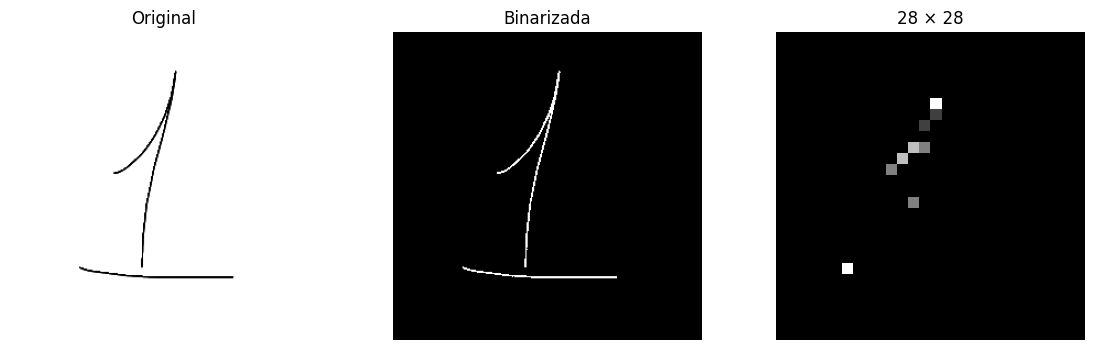


Archivo: 1_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12397
  1   |   0.09043
  2   |   0.09900
  3   |   0.07914
  4   |   0.09795
  5   |   0.08115
  6   |   0.08117
  7   |   0.05131
  8   |   0.19072
  9   |   0.10517


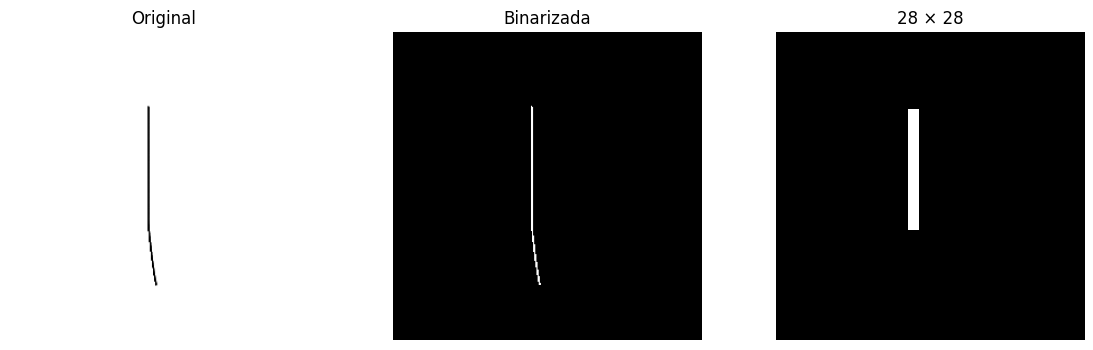


Archivo: 1_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12321
  1   |   0.09192
  2   |   0.09978
  3   |   0.07893
  4   |   0.09676
  5   |   0.08120
  6   |   0.08031
  7   |   0.05152
  8   |   0.19154
  9   |   0.10483


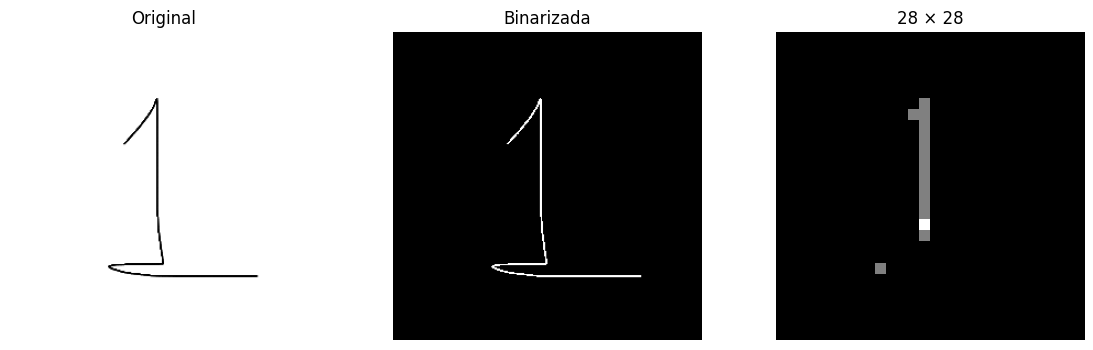


Archivo: 1_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12390
  1   |   0.09012
  2   |   0.09893
  3   |   0.07925
  4   |   0.09735
  5   |   0.08119
  6   |   0.08076
  7   |   0.05106
  8   |   0.19184
  9   |   0.10560


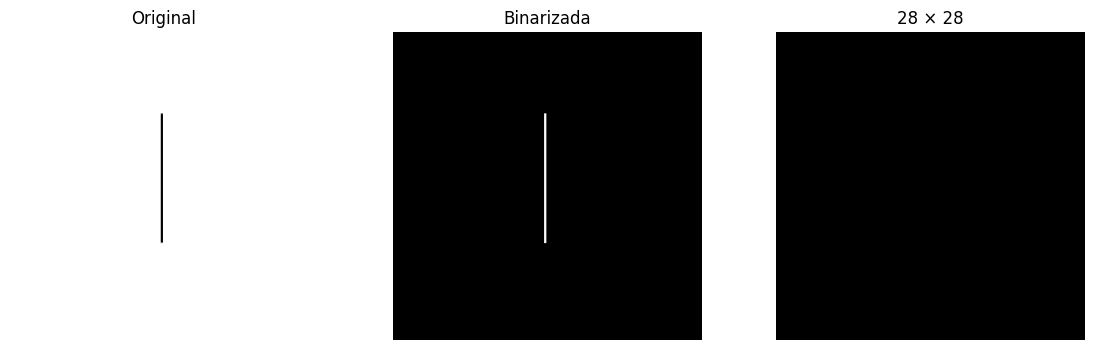


Archivo: 1_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12413
  1   |   0.09089
  2   |   0.09830
  3   |   0.07888
  4   |   0.09990
  5   |   0.08157
  6   |   0.07976
  7   |   0.05166
  8   |   0.18897
  9   |   0.10594


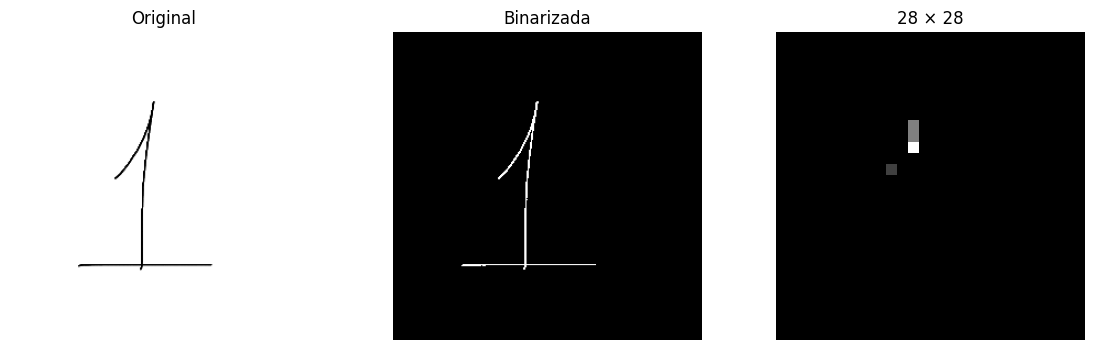


Archivo: 1_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


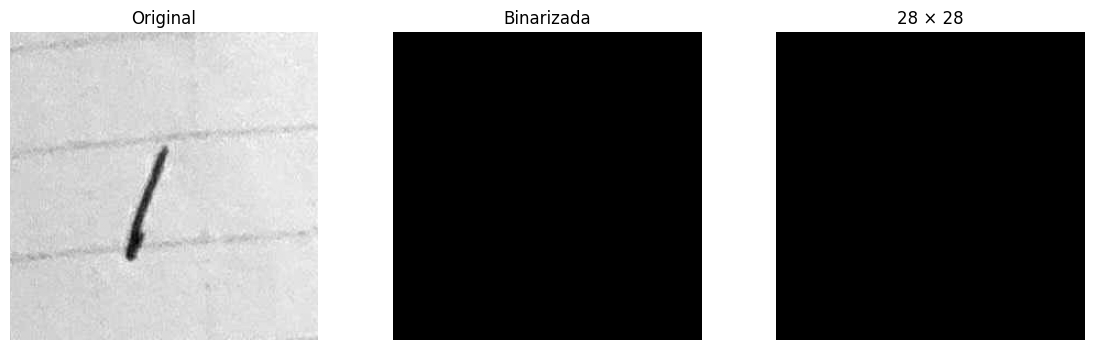


Archivo: 2_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12388
  1   |   0.09043
  2   |   0.09818
  3   |   0.07956
  4   |   0.09862
  5   |   0.08157
  6   |   0.07859
  7   |   0.05153
  8   |   0.19089
  9   |   0.10673


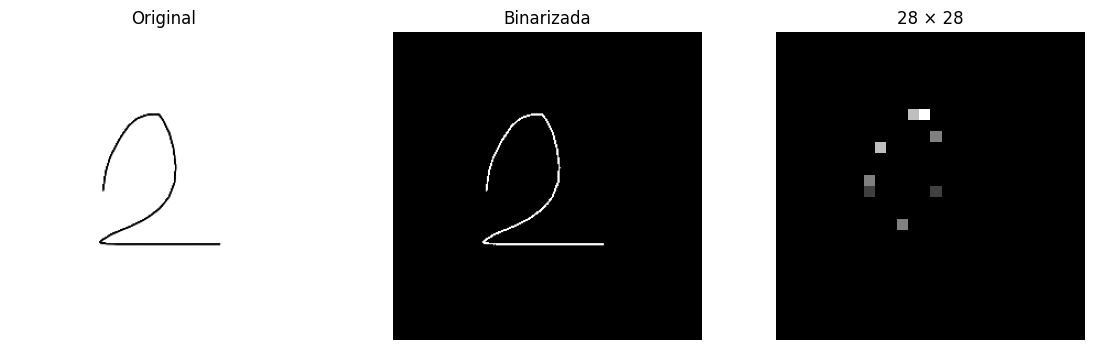


Archivo: 2_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12365
  1   |   0.09092
  2   |   0.09879
  3   |   0.07920
  4   |   0.09889
  5   |   0.08154
  6   |   0.07909
  7   |   0.05187
  8   |   0.19008
  9   |   0.10597


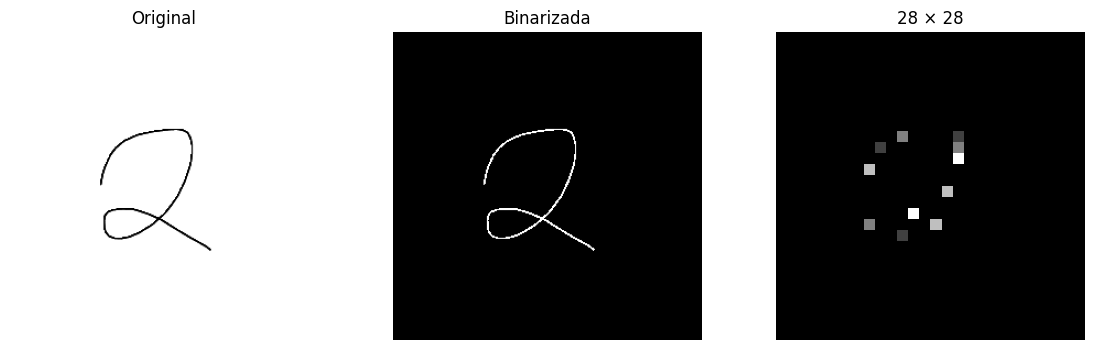


Archivo: 2_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12391
  1   |   0.09031
  2   |   0.09908
  3   |   0.07919
  4   |   0.09761
  5   |   0.08106
  6   |   0.08117
  7   |   0.05126
  8   |   0.19123
  9   |   0.10517


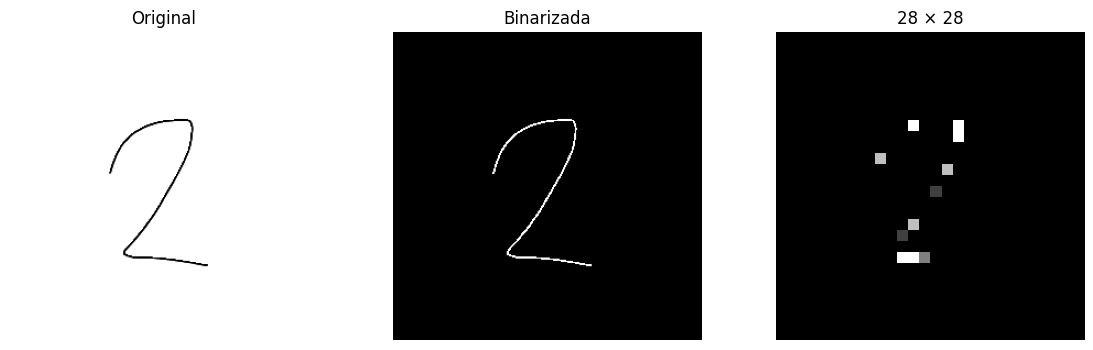


Archivo: 2_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12390
  1   |   0.09022
  2   |   0.09905
  3   |   0.07920
  4   |   0.09745
  5   |   0.08105
  6   |   0.08118
  7   |   0.05121
  8   |   0.19147
  9   |   0.10527


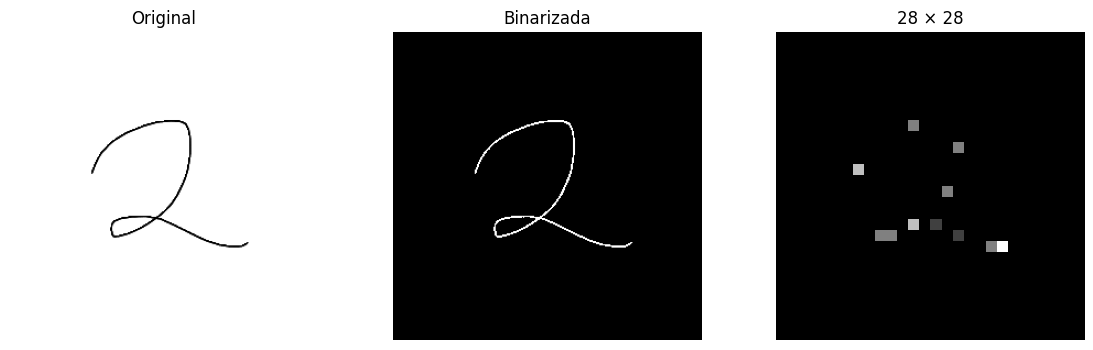


Archivo: 2_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12016
  1   |   0.09341
  2   |   0.10174
  3   |   0.08500
  4   |   0.09365
  5   |   0.08452
  6   |   0.07476
  7   |   0.05222
  8   |   0.18825
  9   |   0.10629


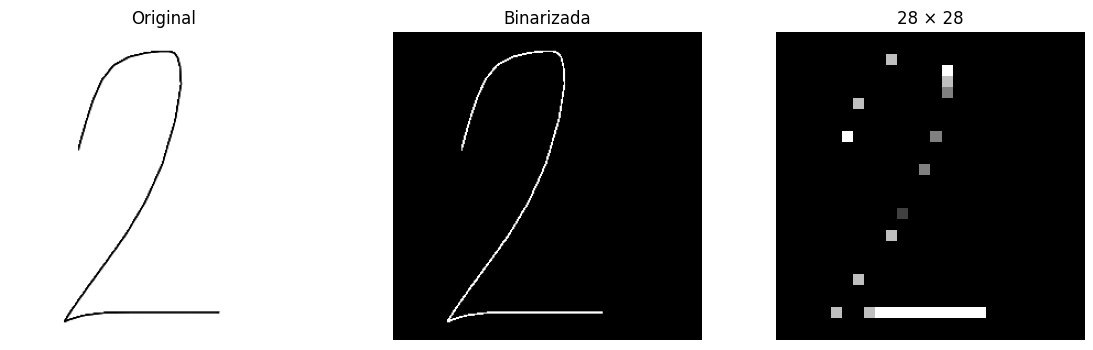


Archivo: 2_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


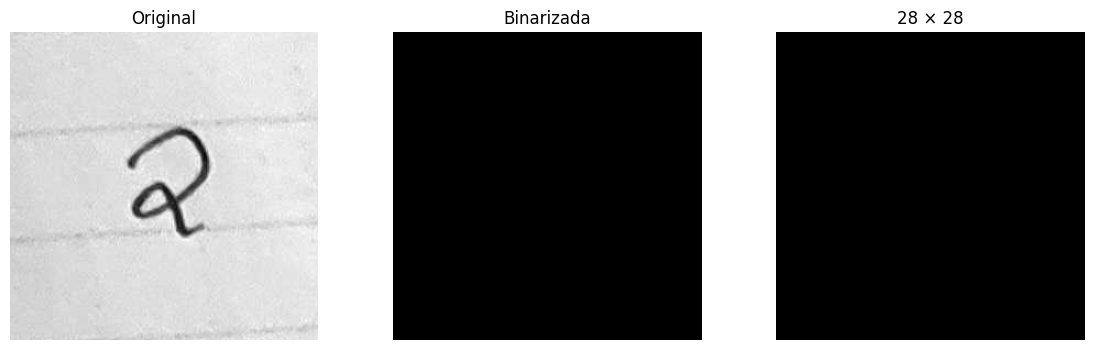


Archivo: 3_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12398
  1   |   0.09039
  2   |   0.09859
  3   |   0.07932
  4   |   0.09827
  5   |   0.08133
  6   |   0.08010
  7   |   0.05136
  8   |   0.19080
  9   |   0.10588


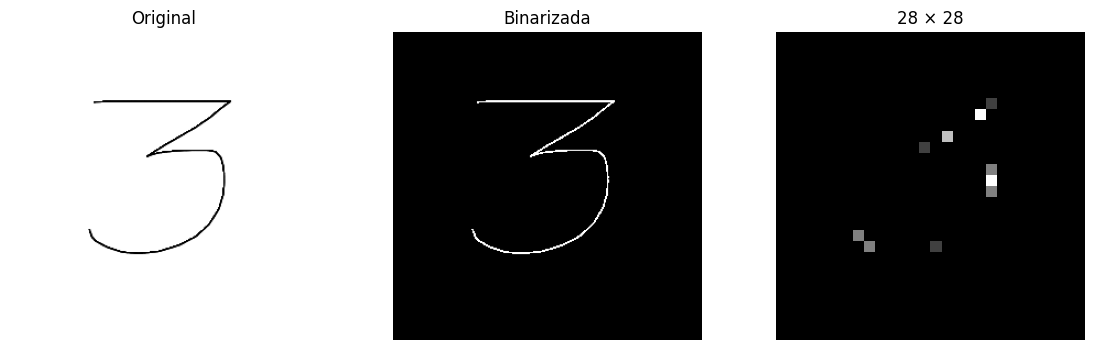


Archivo: 3_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12418
  1   |   0.09084
  2   |   0.09781
  3   |   0.07945
  4   |   0.10008
  5   |   0.08186
  6   |   0.07839
  7   |   0.05169
  8   |   0.18898
  9   |   0.10672


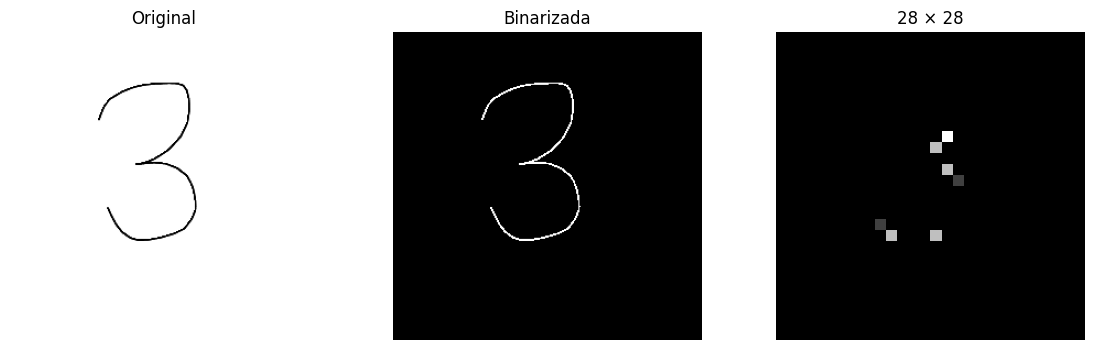


Archivo: 3_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12399
  1   |   0.09050
  2   |   0.09899
  3   |   0.07913
  4   |   0.09814
  5   |   0.08119
  6   |   0.08116
  7   |   0.05135
  8   |   0.19044
  9   |   0.10513


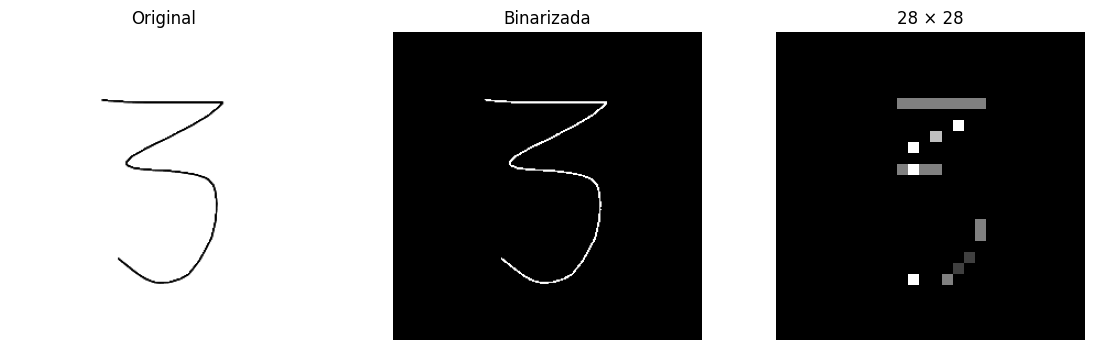


Archivo: 3_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12317
  1   |   0.09089
  2   |   0.09884
  3   |   0.08068
  4   |   0.09739
  5   |   0.08213
  6   |   0.07791
  7   |   0.05155
  8   |   0.19071
  9   |   0.10675


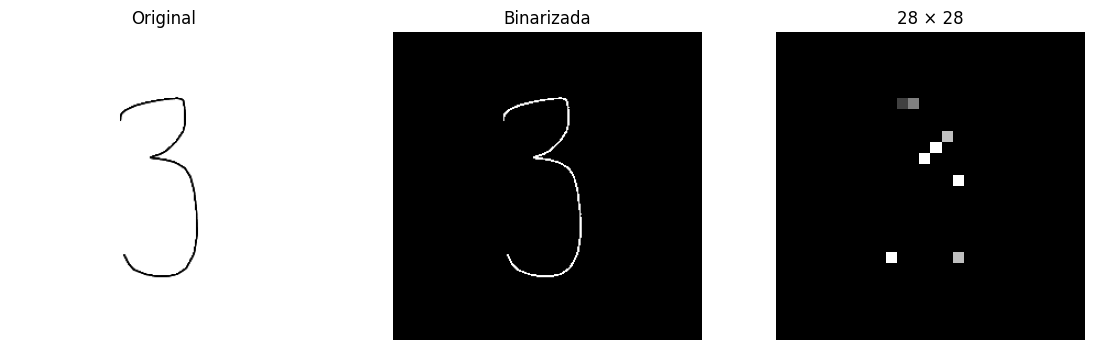


Archivo: 3_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12395
  1   |   0.09048
  2   |   0.09869
  3   |   0.07934
  4   |   0.09827
  5   |   0.08136
  6   |   0.08021
  7   |   0.05139
  8   |   0.19058
  9   |   0.10573


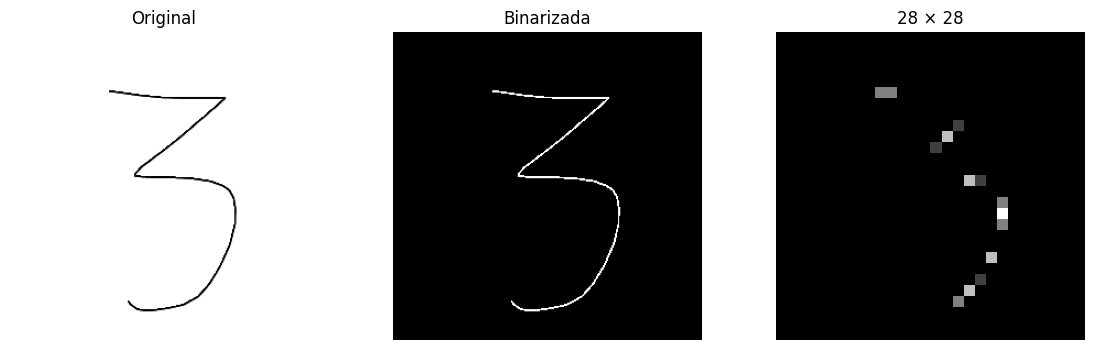


Archivo: 3_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


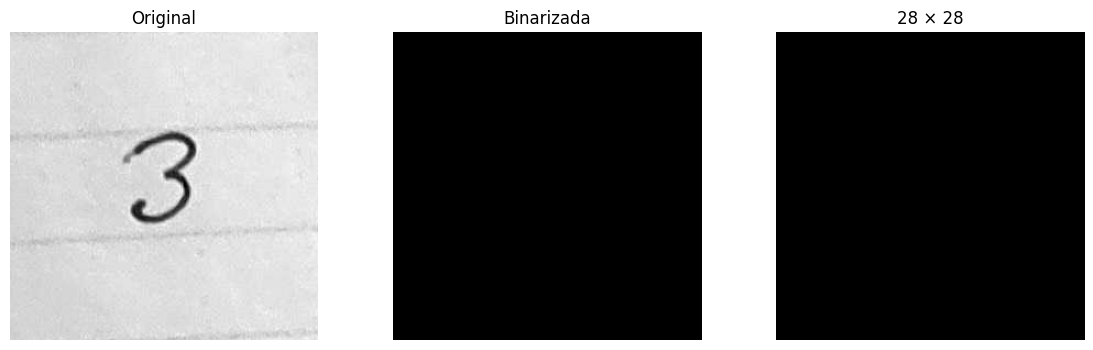


Archivo: 4_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12402
  1   |   0.09067
  2   |   0.09866
  3   |   0.07832
  4   |   0.09935
  5   |   0.08122
  6   |   0.08084
  7   |   0.05152
  8   |   0.18981
  9   |   0.10557


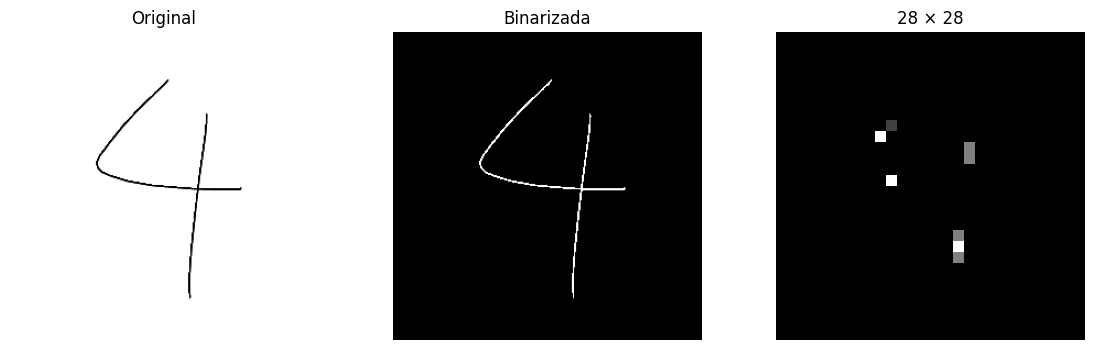


Archivo: 4_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12412
  1   |   0.09064
  2   |   0.09769
  3   |   0.07956
  4   |   0.09973
  5   |   0.08183
  6   |   0.07800
  7   |   0.05162
  8   |   0.18971
  9   |   0.10710


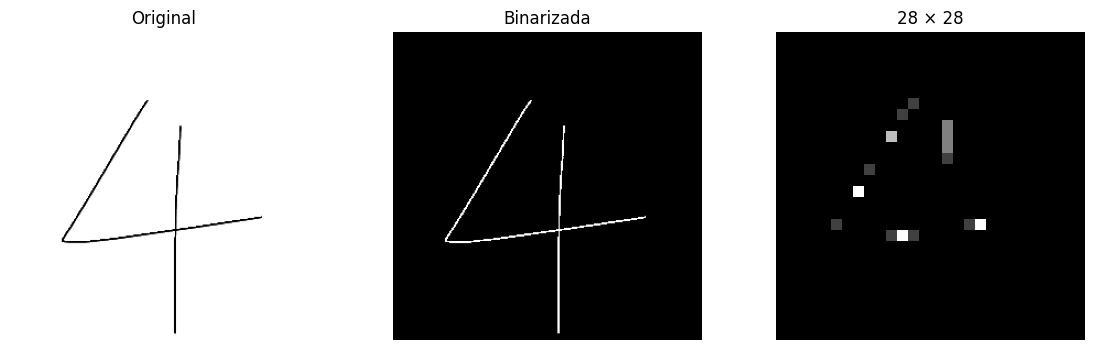


Archivo: 4_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12385
  1   |   0.08997
  2   |   0.09847
  3   |   0.07950
  4   |   0.09743
  5   |   0.08122
  6   |   0.07960
  7   |   0.05119
  8   |   0.19233
  9   |   0.10644


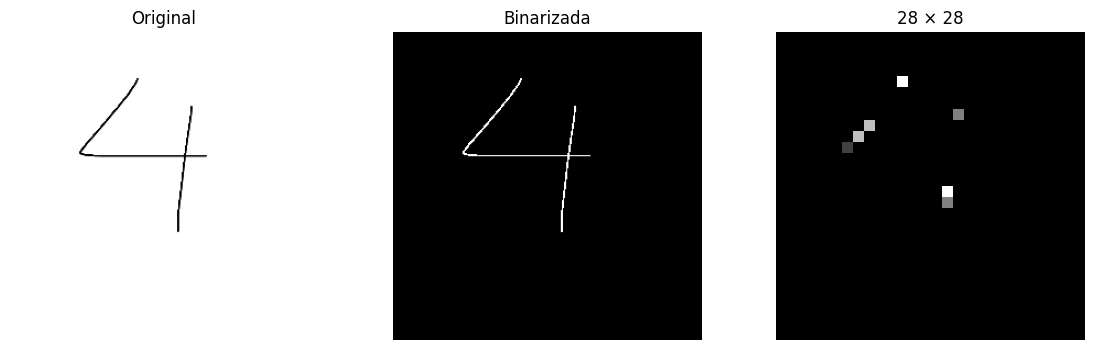


Archivo: 4_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12406
  1   |   0.09079
  2   |   0.09811
  3   |   0.07784
  4   |   0.10057
  5   |   0.08138
  6   |   0.07981
  7   |   0.05170
  8   |   0.18933
  9   |   0.10642


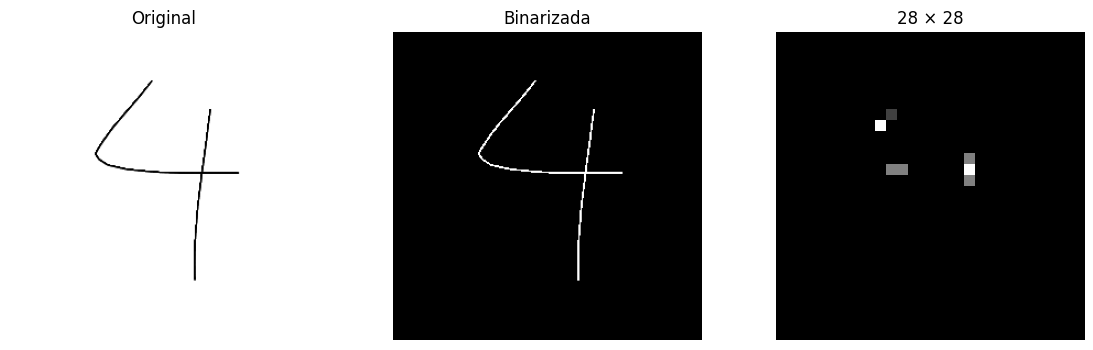


Archivo: 4_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12388
  1   |   0.09018
  2   |   0.09906
  3   |   0.07921
  4   |   0.09733
  5   |   0.08103
  6   |   0.08119
  7   |   0.05119
  8   |   0.19164
  9   |   0.10529


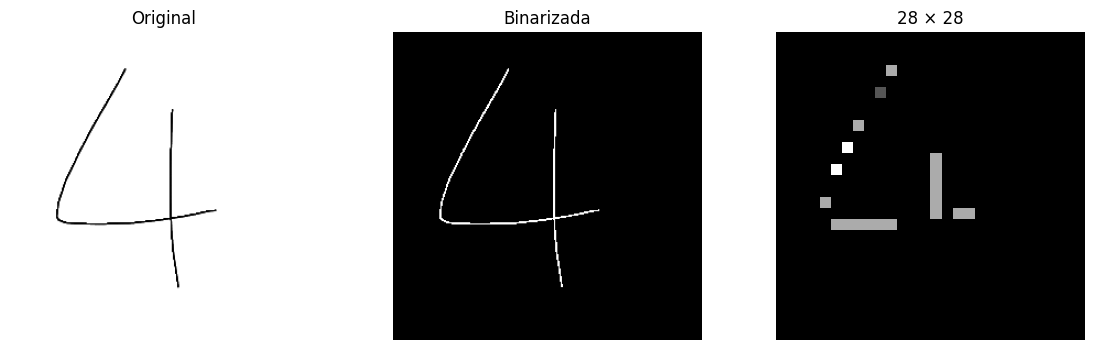


Archivo: 4_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


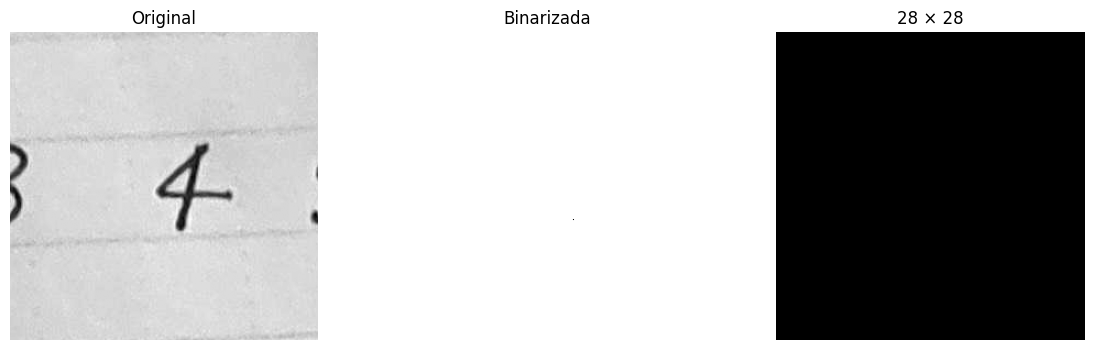


Archivo: 5_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12383
  1   |   0.09035
  2   |   0.09862
  3   |   0.07922
  4   |   0.09814
  5   |   0.08130
  6   |   0.07974
  7   |   0.05143
  8   |   0.19126
  9   |   0.10611


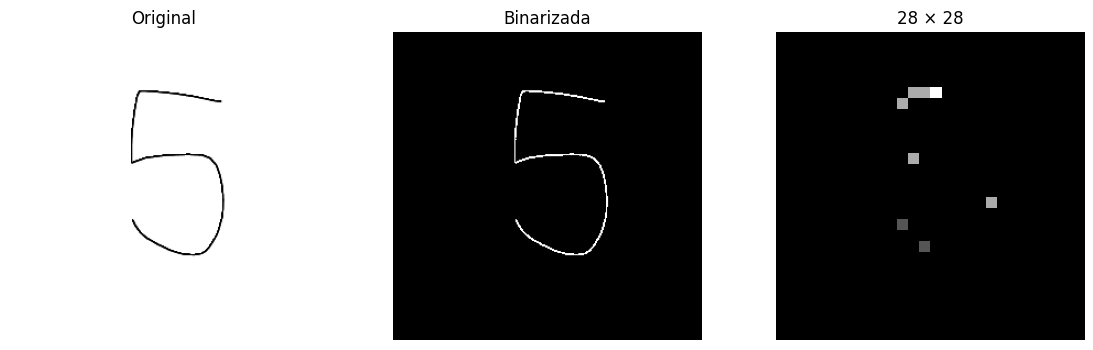


Archivo: 5_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12356
  1   |   0.09075
  2   |   0.09862
  3   |   0.07929
  4   |   0.09867
  5   |   0.08155
  6   |   0.07848
  7   |   0.05184
  8   |   0.19077
  9   |   0.10647


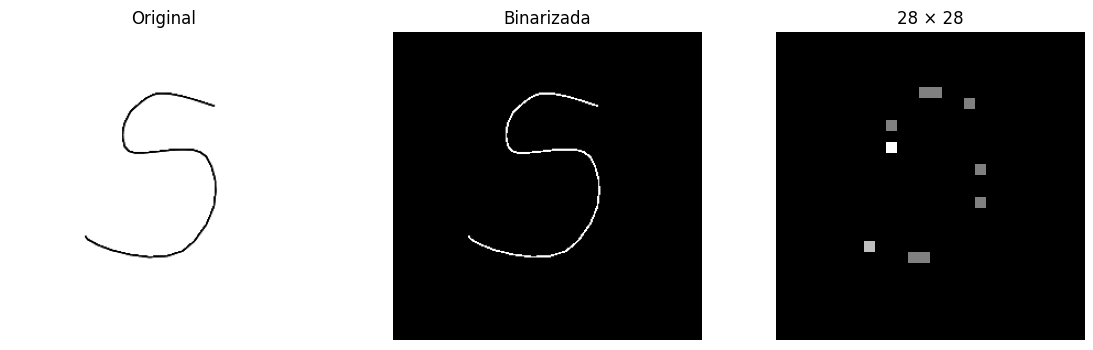


Archivo: 5_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12383
  1   |   0.09033
  2   |   0.09824
  3   |   0.07959
  4   |   0.09832
  5   |   0.08151
  6   |   0.07862
  7   |   0.05148
  8   |   0.19131
  9   |   0.10676


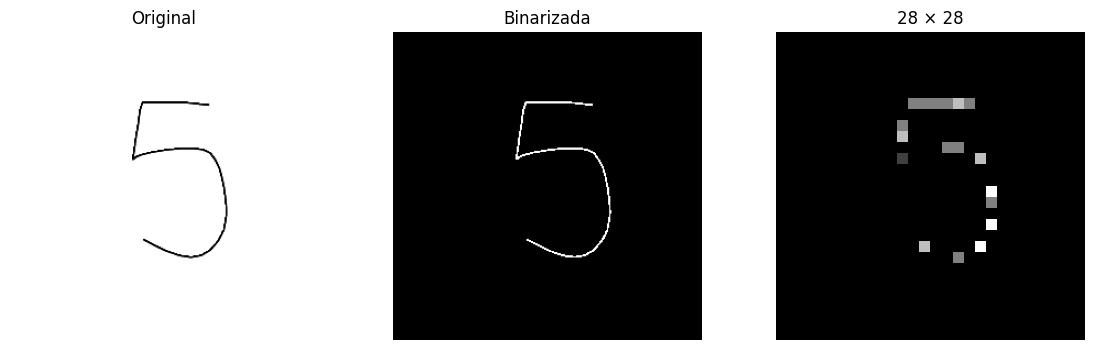


Archivo: 5_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12347
  1   |   0.09123
  2   |   0.09900
  3   |   0.08017
  4   |   0.09835
  5   |   0.08203
  6   |   0.07908
  7   |   0.05167
  8   |   0.18916
  9   |   0.10584


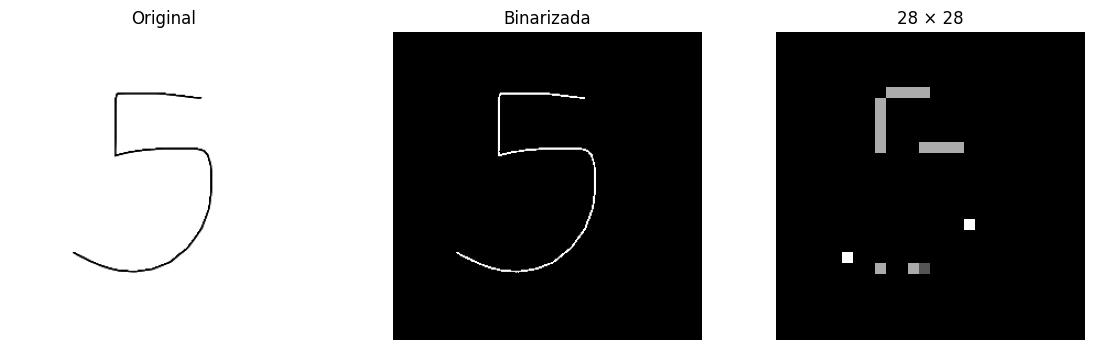


Archivo: 5_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12099
  1   |   0.09442
  2   |   0.09961
  3   |   0.07909
  4   |   0.10157
  5   |   0.08406
  6   |   0.06820
  7   |   0.05601
  8   |   0.18777
  9   |   0.10828


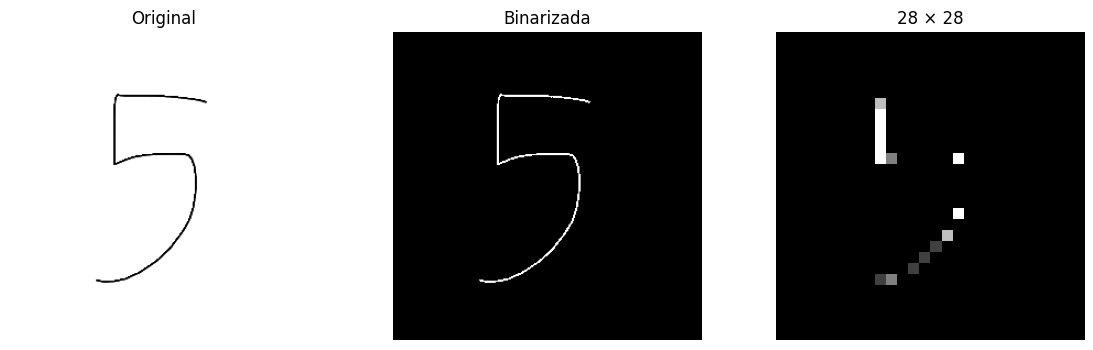


Archivo: 5_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


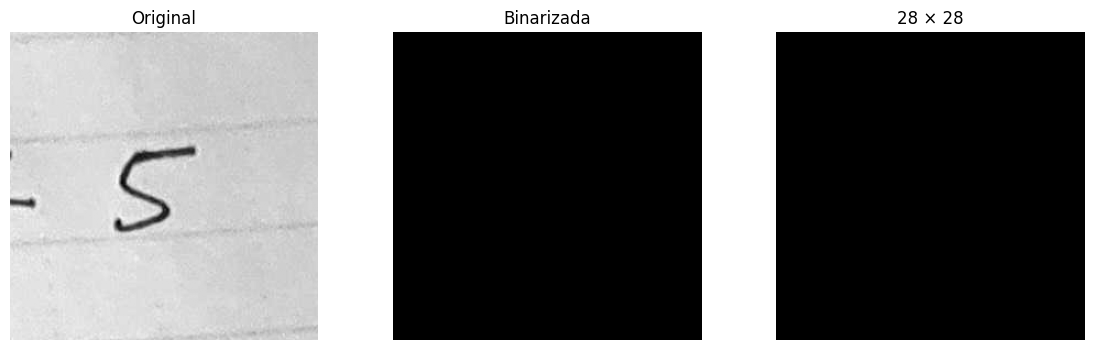


Archivo: 6_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12416
  1   |   0.09070
  2   |   0.09887
  3   |   0.07900
  4   |   0.09866
  5   |   0.08141
  6   |   0.08123
  7   |   0.05128
  8   |   0.18964
  9   |   0.10505


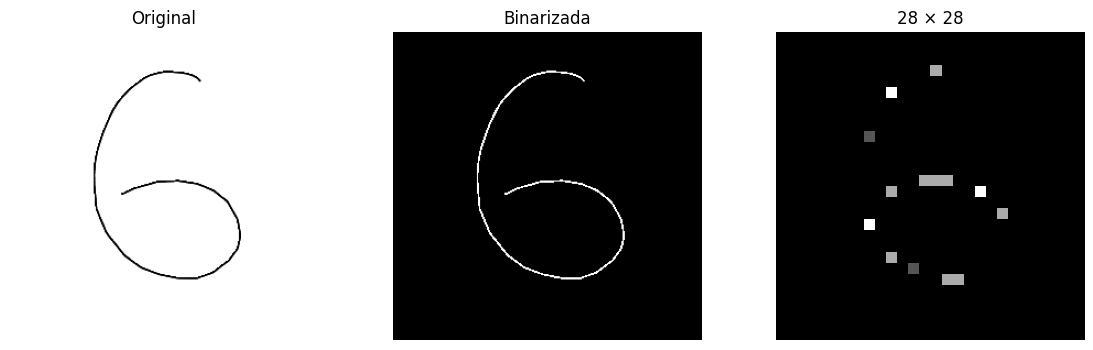


Archivo: 6_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12391
  1   |   0.09013
  2   |   0.09830
  3   |   0.07951
  4   |   0.09797
  5   |   0.08136
  6   |   0.07926
  7   |   0.05129
  8   |   0.19170
  9   |   0.10657


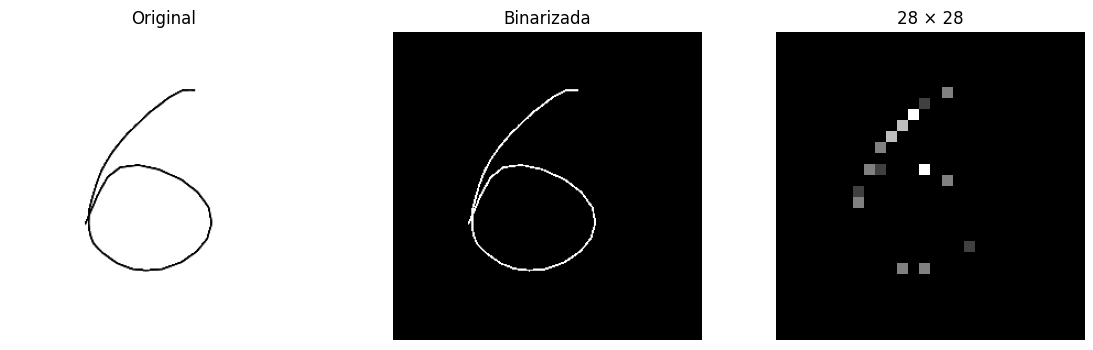


Archivo: 6_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12405
  1   |   0.09068
  2   |   0.09895
  3   |   0.07908
  4   |   0.09857
  5   |   0.08127
  6   |   0.08114
  7   |   0.05143
  8   |   0.18980
  9   |   0.10504


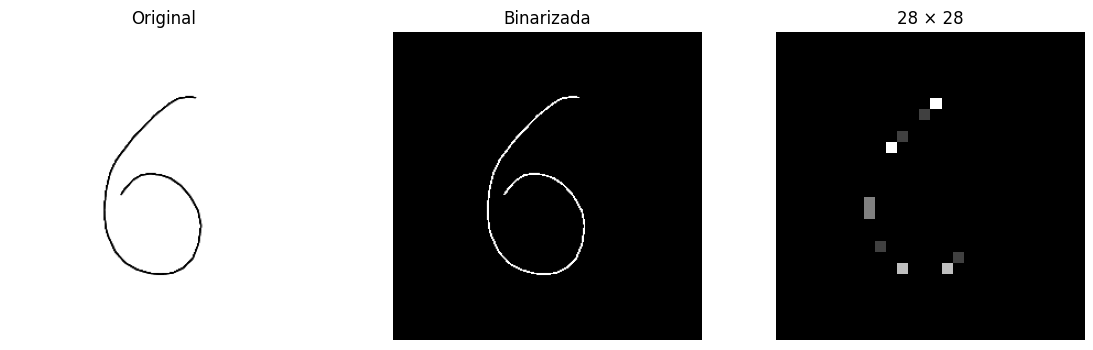


Archivo: 6_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12412
  1   |   0.09068
  2   |   0.09890
  3   |   0.07903
  4   |   0.09862
  5   |   0.08136
  6   |   0.08120
  7   |   0.05133
  8   |   0.18972
  9   |   0.10505


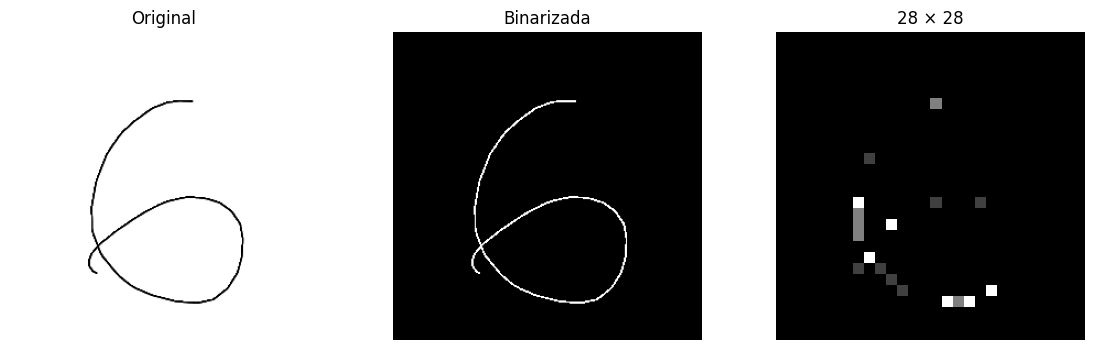


Archivo: 6_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12389
  1   |   0.09114
  2   |   0.09988
  3   |   0.07927
  4   |   0.09909
  5   |   0.08094
  6   |   0.08097
  7   |   0.05180
  8   |   0.18941
  9   |   0.10362


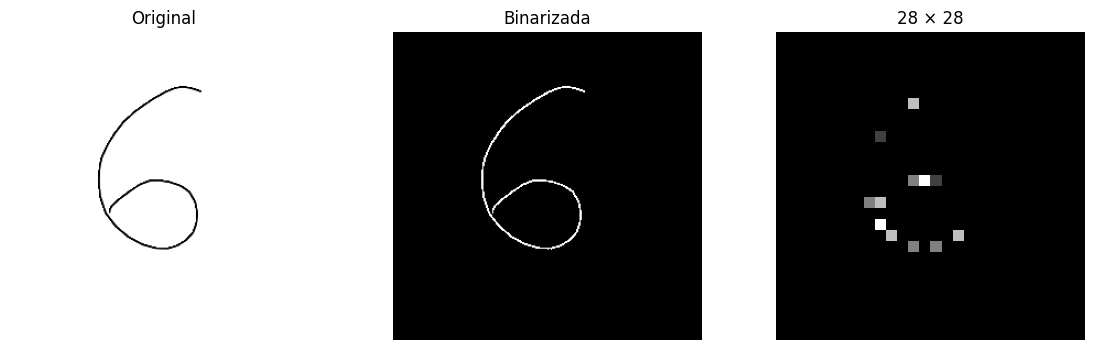


Archivo: 6_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


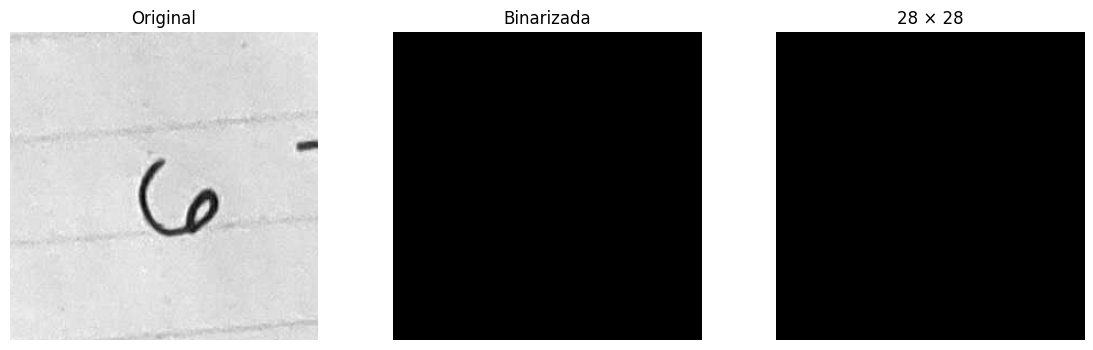


Archivo: 7_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12401
  1   |   0.09083
  2   |   0.09812
  3   |   0.07683
  4   |   0.10129
  5   |   0.08118
  6   |   0.08035
  7   |   0.05178
  8   |   0.18918
  9   |   0.10643


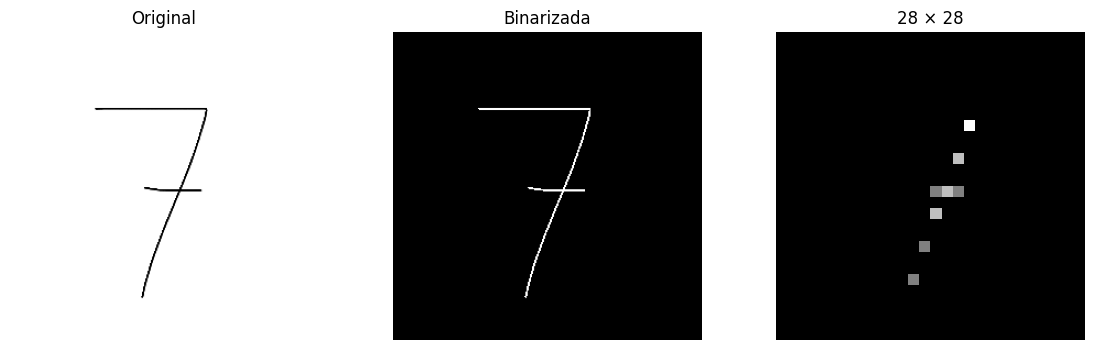


Archivo: 7_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12392
  1   |   0.09025
  2   |   0.09823
  3   |   0.07875
  4   |   0.09876
  5   |   0.08129
  6   |   0.07948
  7   |   0.05140
  8   |   0.19127
  9   |   0.10664


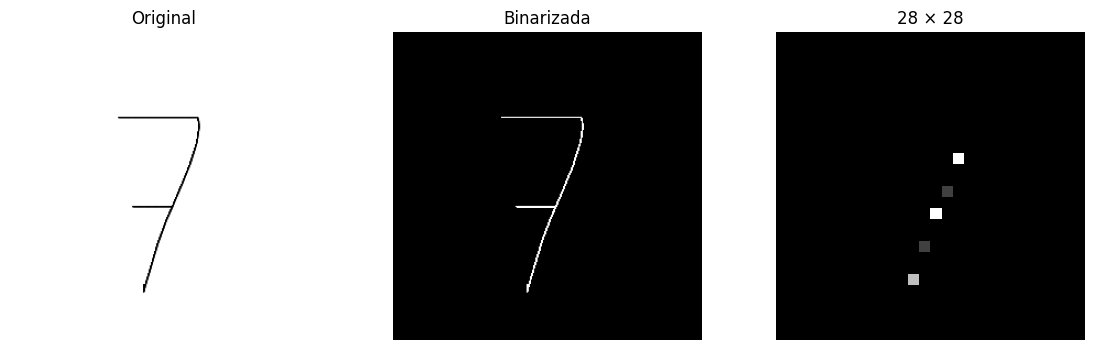


Archivo: 7_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12347
  1   |   0.09037
  2   |   0.09936
  3   |   0.07979
  4   |   0.09667
  5   |   0.08131
  6   |   0.08055
  7   |   0.05124
  8   |   0.19178
  9   |   0.10546


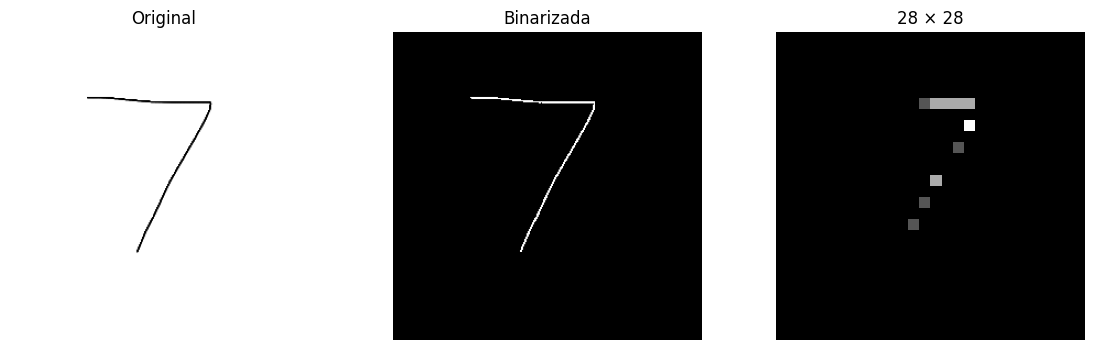


Archivo: 7_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12378
  1   |   0.09061
  2   |   0.09862
  3   |   0.07945
  4   |   0.09844
  5   |   0.08148
  6   |   0.07924
  7   |   0.05162
  8   |   0.19065
  9   |   0.10611


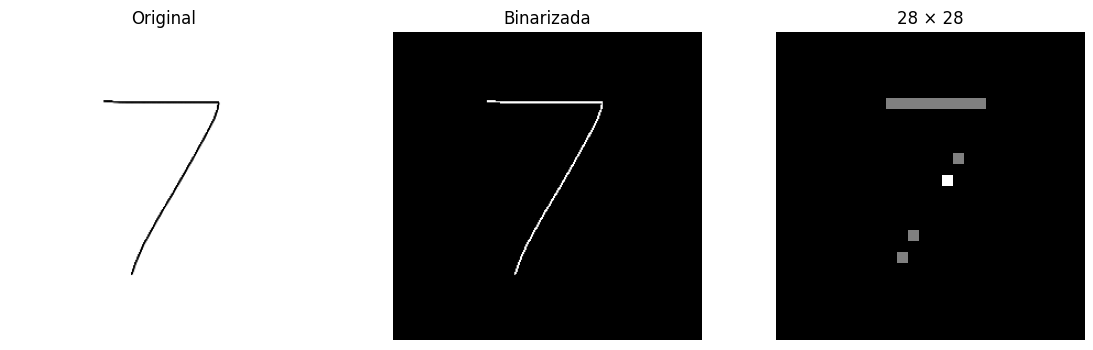


Archivo: 7_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12364
  1   |   0.09123
  2   |   0.09835
  3   |   0.07962
  4   |   0.09973
  5   |   0.08196
  6   |   0.07751
  7   |   0.05215
  8   |   0.18919
  9   |   0.10662


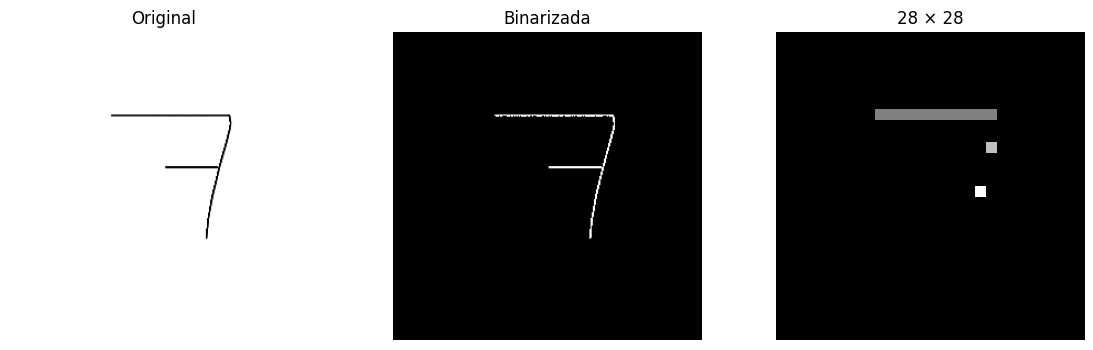


Archivo: 7_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


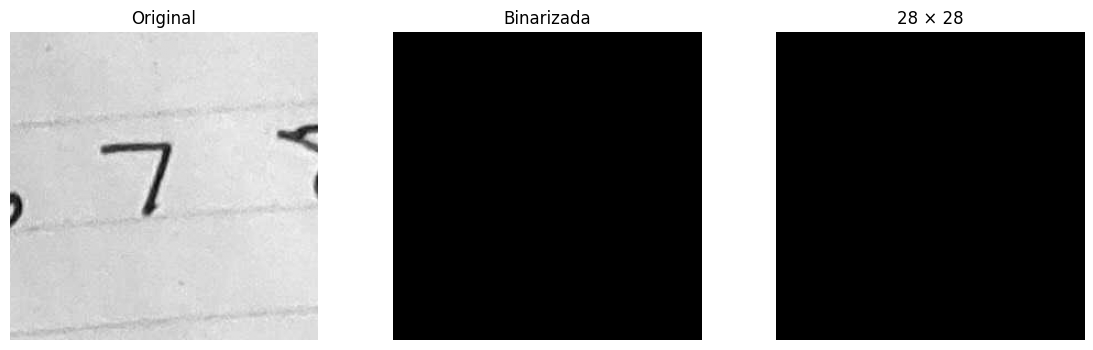


Archivo: 8_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12358
  1   |   0.08994
  2   |   0.09905
  3   |   0.07939
  4   |   0.09613
  5   |   0.08091
  6   |   0.08040
  7   |   0.05103
  8   |   0.19364
  9   |   0.10592


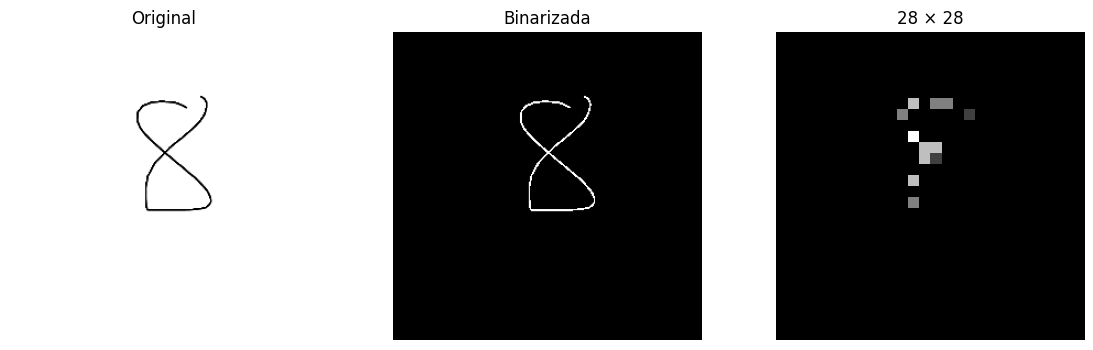


Archivo: 8_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12365
  1   |   0.09080
  2   |   0.09845
  3   |   0.07961
  4   |   0.09881
  5   |   0.08170
  6   |   0.07811
  7   |   0.05185
  8   |   0.19044
  9   |   0.10659


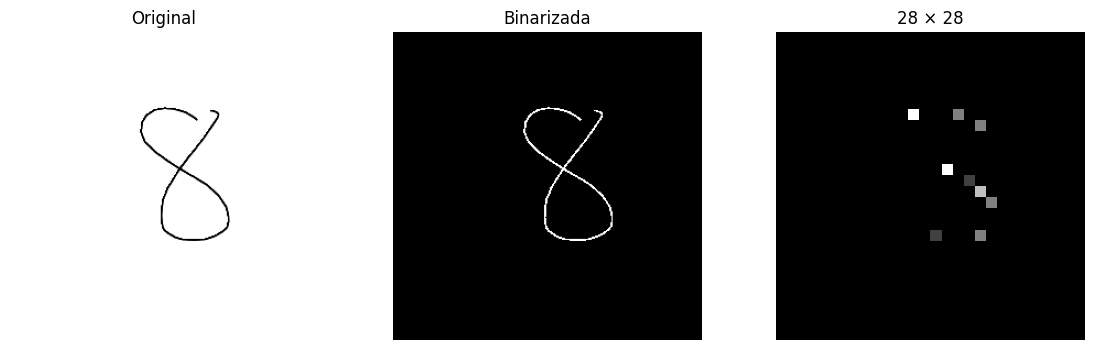


Archivo: 8_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12395
  1   |   0.09029
  2   |   0.09854
  3   |   0.07937
  4   |   0.09809
  5   |   0.08131
  6   |   0.07992
  7   |   0.05133
  8   |   0.19116
  9   |   0.10605


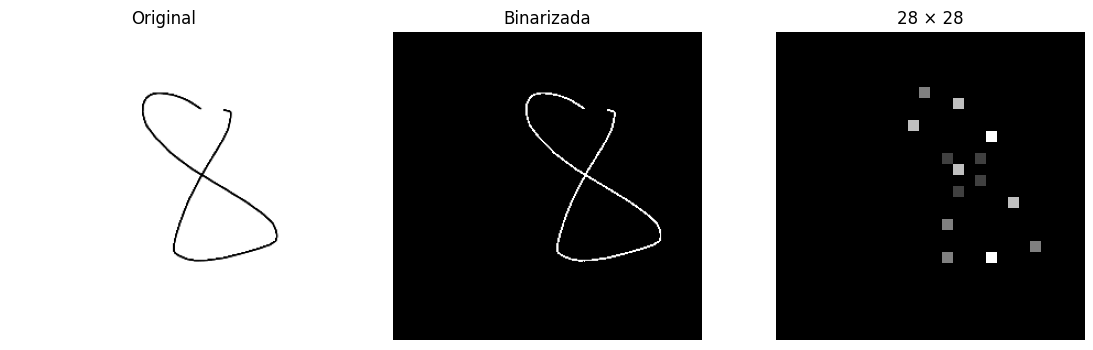


Archivo: 8_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12399
  1   |   0.09040
  2   |   0.09843
  3   |   0.07937
  4   |   0.09844
  5   |   0.08140
  6   |   0.07970
  7   |   0.05139
  8   |   0.19075
  9   |   0.10613


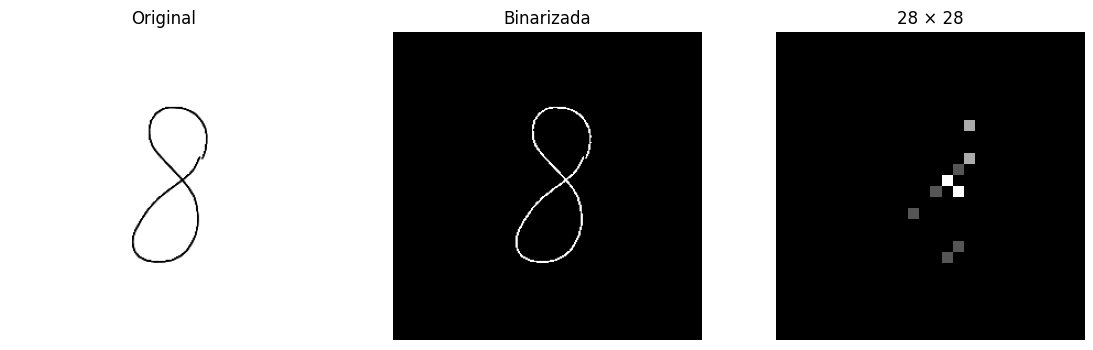


Archivo: 8_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12446
  1   |   0.09074
  2   |   0.09851
  3   |   0.07885
  4   |   0.09903
  5   |   0.08186
  6   |   0.08112
  7   |   0.05087
  8   |   0.18923
  9   |   0.10533


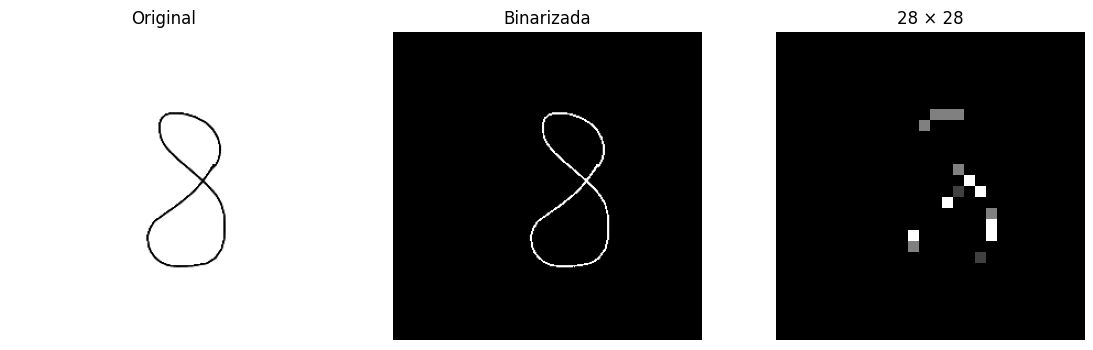


Archivo: 8_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


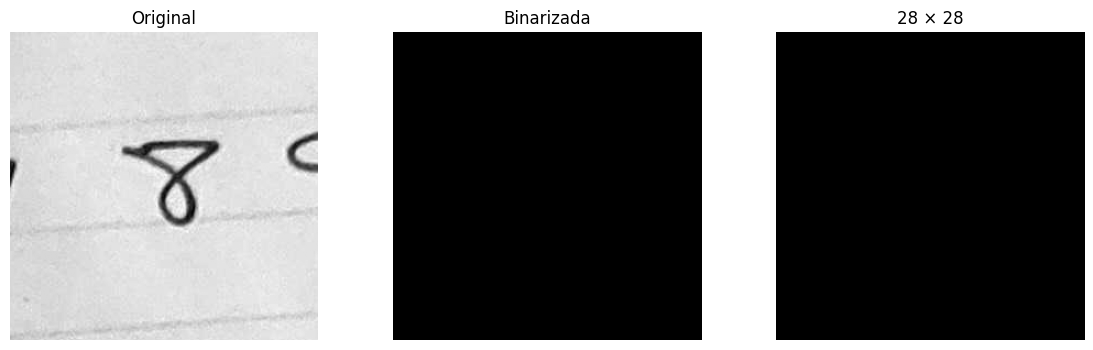


Archivo: 9_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12410
  1   |   0.09130
  2   |   0.09813
  3   |   0.07898
  4   |   0.10080
  5   |   0.08187
  6   |   0.07883
  7   |   0.05197
  8   |   0.18787
  9   |   0.10615


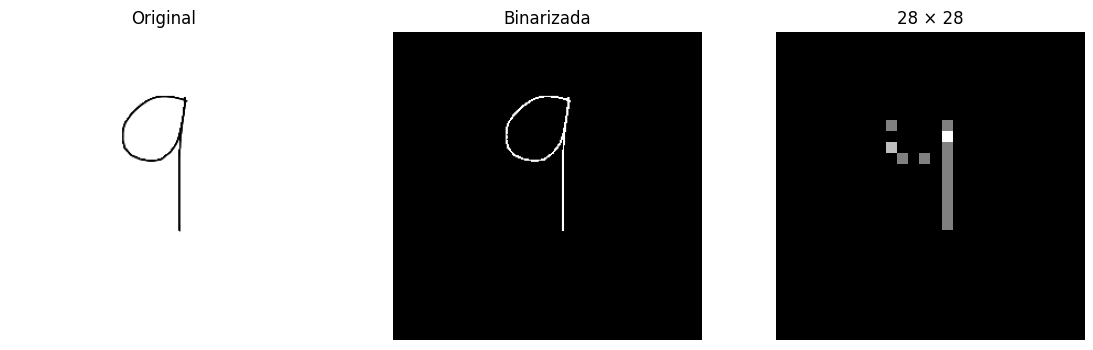


Archivo: 9_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12413
  1   |   0.09067
  2   |   0.09715
  3   |   0.07936
  4   |   0.10058
  5   |   0.08201
  6   |   0.07689
  7   |   0.05174
  8   |   0.18950
  9   |   0.10798


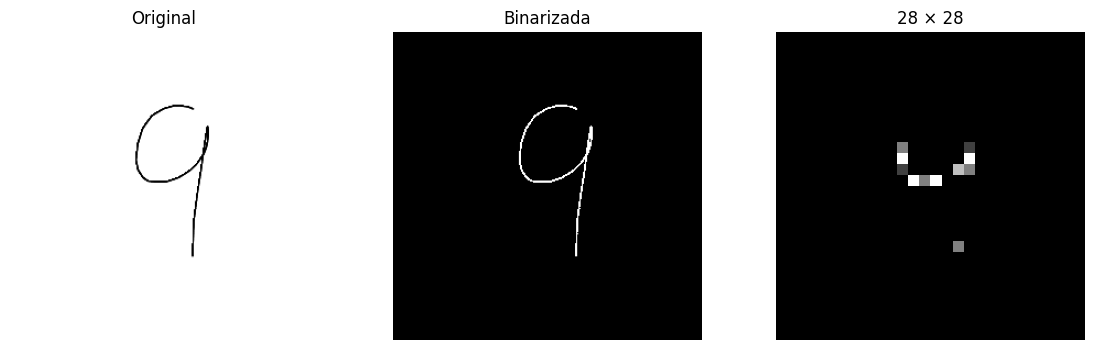


Archivo: 9_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12398
  1   |   0.09055
  2   |   0.09849
  3   |   0.07818
  4   |   0.09940
  5   |   0.08120
  6   |   0.08047
  7   |   0.05151
  8   |   0.19024
  9   |   0.10598


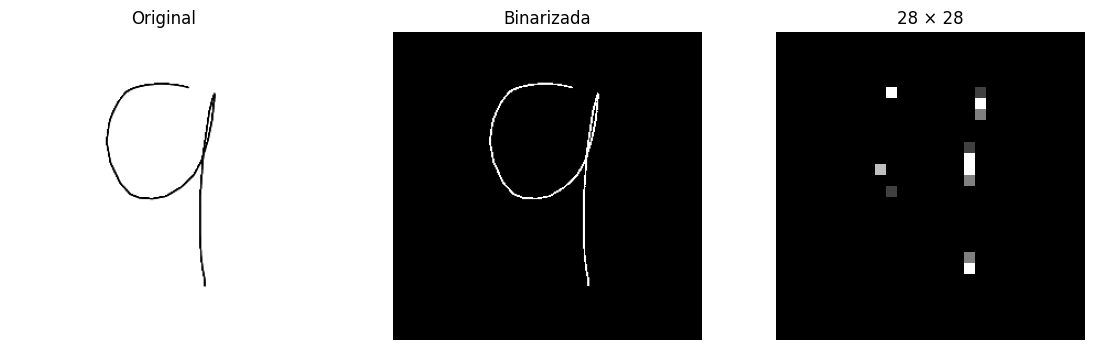


Archivo: 9_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12384
  1   |   0.09026
  2   |   0.09857
  3   |   0.07945
  4   |   0.09788
  5   |   0.08132
  6   |   0.07959
  7   |   0.05137
  8   |   0.19152
  9   |   0.10621


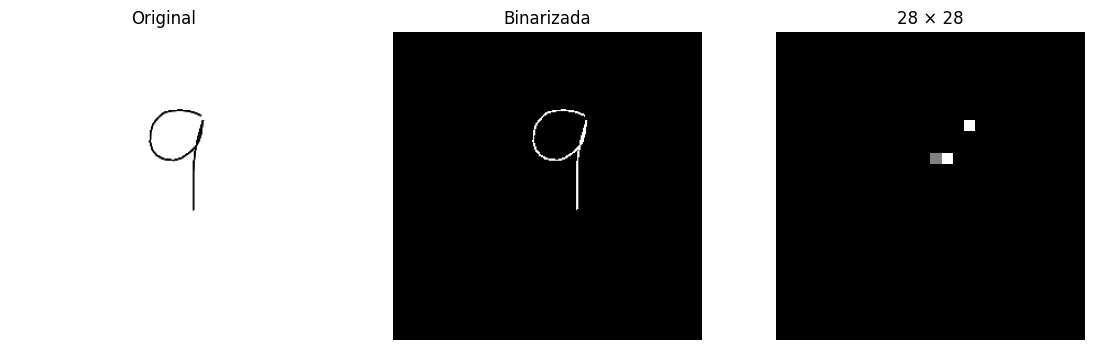


Archivo: 9_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12373
  1   |   0.09212
  2   |   0.09732
  3   |   0.07830
  4   |   0.10358
  5   |   0.08249
  6   |   0.07557
  7   |   0.05290
  8   |   0.18615
  9   |   0.10784


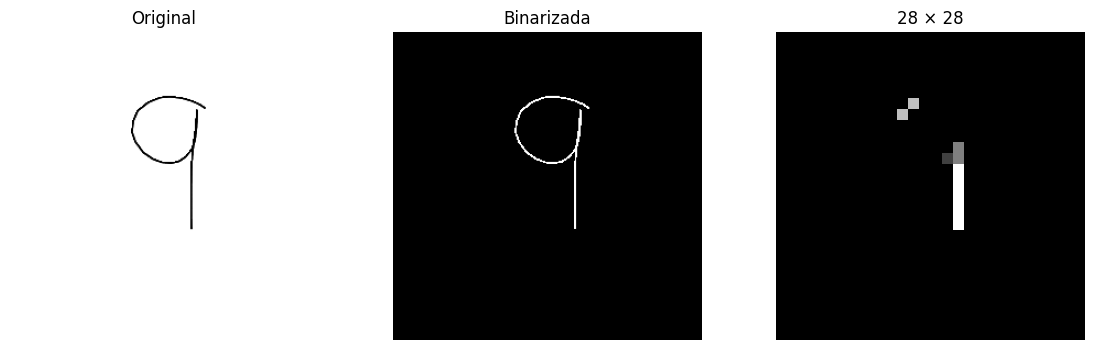


Archivo: 9_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.12238
  1   |   0.08910
  2   |   0.10007
  3   |   0.08094
  4   |   0.09216
  5   |   0.08091
  6   |   0.07983
  7   |   0.05056
  8   |   0.19762
  9   |   0.10643


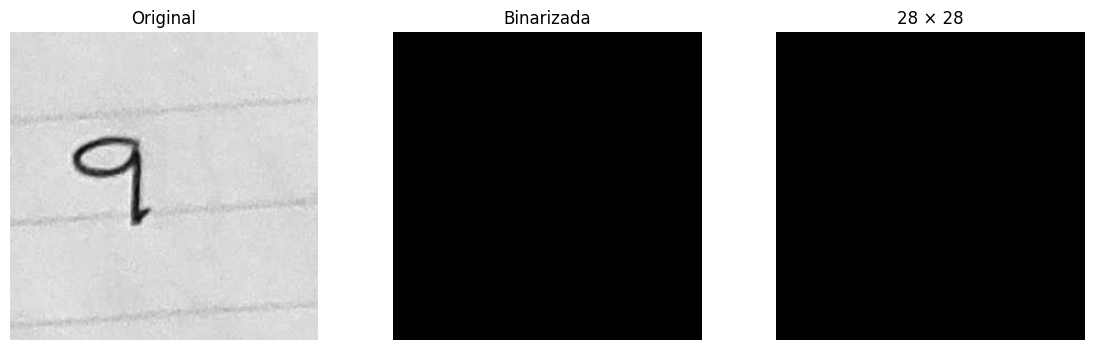

In [9]:
# ==========================
#   PROBLEMA 3 - PROCESAR 60 IMÁGENES Y CLASIFICARLAS
# ==========================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# ---------------------------------------------------------
# 1) Montar Google Drive
# ---------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# ---------------------------------------------------------
# 2) Ruta donde están las imágenes del usuario
# ---------------------------------------------------------
num_dir = "/content/drive/MyDrive/ITC 5to Semestre/Inteligencia Artificial/Numeros A3.2"

print("Directorio seleccionado:")
print(num_dir)

# ---------------------------------------------------------
# 4) Configuración del procesamiento
# ---------------------------------------------------------
THRESH_VALUE = 150     # Ajusta manualmente si las imágenes salen demasiado blancas o negras

# ---------------------------------------------------------
# 5) Recorrer las imágenes (50 = 10 números × 5 repeticiones)
# ---------------------------------------------------------
for digit in range(10):
    for rep in range(6):

        # Nombre de archivo ejemplo: 0_0.png, 0_1.png, ..., 9_4.png
        filename = f"{digit}_{rep}.png"
        filepath = os.path.join(num_dir, filename)

        # Verificar si existe
        if not os.path.exists(filepath):
            print(f"⚠️ Warning: No se encontró {filepath}")
            continue

        # -----------------------------
        # 6) PROCESAMIENTO DE IMAGEN
        # -----------------------------

        # Cargar en escala de grises
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        # Binarización con umbral
        _, thresh = cv2.threshold(image, THRESH_VALUE, 255, cv2.THRESH_BINARY_INV)

        # Redimensionar a 28×28
        resized = cv2.resize(thresh, (28, 28))

        # -----------------------------
        # 7) PREPARAR PARA LA RED
        # -----------------------------
        input_img = resized.reshape(1, 28, 28, 1).astype("float32") / 255.0

        # -----------------------------
        # 8) PREDICCIÓN
        # -----------------------------
        prediction = model.predict(input_img, verbose=0)
        predicted_label = np.argmax(prediction)

        # -----------------------------
        # 9) Mostrar resultados
        # -----------------------------
        print("\n=======================================")
        print(f"Archivo: {filename}")
        print("Predicción:", predicted_label)
        print("Digit | Probability")
        print("-------------------")
        for i, prob in enumerate(prediction[0]):
            print(f"  {i}   |   {prob:.5f}")

        # -----------------------------
        # 10) Mostrar imágenes
        # -----------------------------
        fig, axes = plt.subplots(1, 3, figsize=(14, 4))

        axes[0].imshow(image, cmap='gray')
        axes[0].set_title('Original')
        axes[0].axis('off')

        axes[1].imshow(thresh, cmap='gray')
        axes[1].set_title('Binarizada')
        axes[1].axis('off')

        axes[2].imshow(resized, cmap='gray')
        axes[2].set_title('28 × 28')
        axes[2].axis('off')

        plt.show()

true_labels = []
predicted_labels = []

for digit in range(10):
    for rep in range(6):
        filename = f"{digit}_{rep}.png"
        full_path = os.path.join(num_dir, filename)   # ← CORREGIDO

        # 1) Cargar imagen en escala de grises
        img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)

        # Validar imagen
        if img is None:
            print(f"ERROR: No se pudo cargar la imagen → {full_path}")
            continue

        # 2) Binarización
        _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

        # 3) Redimensionar a 28x28
        resized = cv2.resize(thresh, (28, 28))

        # 4) Preparar para el modelo
        input_img = resized.reshape(1, 28, 28, 1)
        prediction = model.predict(input_img, verbose=0)
        predicted_digit = np.argmax(prediction)

        # 5) Guardar etiquetas reales y predichas
        true_labels.append(digit)
        predicted_labels.append(predicted_digit)

Segun las imagenes ya preprocesadas de los digitos nuevos de prueba, se puede ver claramente que NO estan siendo procesadas adecuadamente, ya que en la gran mayoria de las imagenes, se pierde parcial o totalmente el numero.

De igual forma, se generara una matriz de confusion y un reporte de resultados que contiene precision, sensibilidad, el F1-score, y el soporte (es decir, la cantidad real de muestras pertenecientes a cada clase)

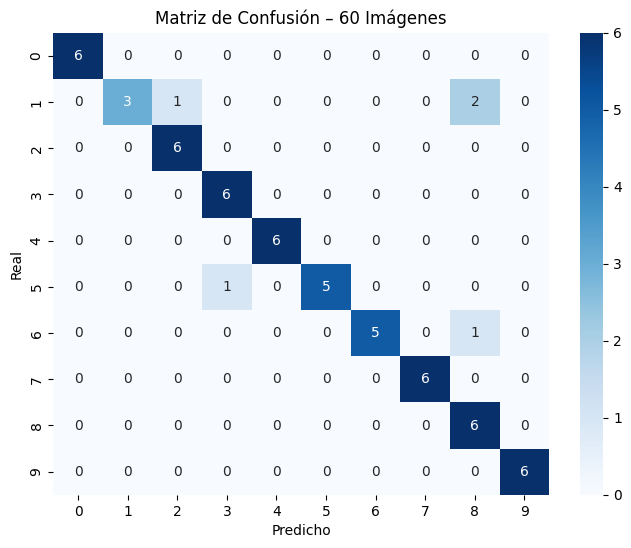

 REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         6
           2       0.86      1.00      0.92         6
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         6
           5       1.00      0.83      0.91         6
           6       1.00      0.83      0.91         6
           7       1.00      1.00      1.00         6
           8       0.67      1.00      0.80         6
           9       1.00      1.00      1.00         6

    accuracy                           0.92        60
   macro avg       0.94      0.92      0.91        60
weighted avg       0.94      0.92      0.91        60


Accuracy total con las 60 imágenes: 91.67%

 IMÁGENES MAL CLASIFICADAS

Total de errores: 5 de 60 imágenes


In [17]:
# ==========================
#   PROBLEMA 4 – EVALUACIÓN DEL MODELO
# ==========================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Desactivar advertencias de métricas indefinidas
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# ---------------------------------------------------------
# 1) Convertir listas a NumPy
# ---------------------------------------------------------
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# ---------------------------------------------------------
# 2) Matriz de Confusión
# ---------------------------------------------------------
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.title("Matriz de Confusión – 60 Imágenes")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# ---------------------------------------------------------
# 3) Reporte de Clasificación
# ---------------------------------------------------------
print("====================================")
print(" REPORTE DE CLASIFICACIÓN")
print("====================================")
print(classification_report(true_labels, predicted_labels, zero_division=0))

# ---------------------------------------------------------
# 4) Exactitud total
# ---------------------------------------------------------
accuracy = np.mean(true_labels == predicted_labels)
print(f"\nAccuracy total con las 60 imágenes: {accuracy*100:.2f}%")

# ---------------------------------------------------------
# 5) Errores
# ---------------------------------------------------------
print("\n====================================")
print(" IMÁGENES MAL CLASIFICADAS")
print("====================================")

errors = 0
for i in range(len(true_labels)):
    if true_labels[i] != predicted_labels[i]:
        errors += 1

print(f"\nTotal de errores: {errors} de 60 imágenes")


Se puede ver que de 60 predicciones, se equivoco en 48 ocaciones. Es decir, tuvo un accuracy de solo el 20%, significando que el modelo NO se pudo adaptar a imagenes que no fueran originalmente del MNIST.

Ahora, se realizaran 3 cambios que ayudaran a mejorar los resultados obtenidos.

El primer cambio, sera al modelo, en el cual se estandarizaran las imagenes de MNIST para que siempre sean de las mismas dimensiones que otras imagenes ya estandarizadas. De no ser el caso, se estaran manejando distintas dimensiones segun la imagen.

El segundo cambio representa un cambio en el preprocesamiento de la imagen, en el cual tras pasar la imagen a una escala de grises e invertir los colores, mediante operaciones morphologicas se reducira el ruido en la imagen (disminuyendo el peso de los pixeles y luego regresandolos al peso original), y eliminara tambien bloques grandes con alto peso (ya que se asume que no son trazos de numeros). Despues, mediante OTSU, se generara un threshold basado en el punto mas oscuro, y binarizara la imagen a blanco y negro (con el proposito de permitir que muy pocos pixeles se vuelvan blancos).

La tercer mejora, ahora se enfoca en encontrar el "centro de masa" de la area con mayor peso en la imagen (enfocado principalmente en el centro de la imagen), y hara un bounding box alrededor. Estirara o encogera (de manera proporcional) el lado mas largo del nuevo recuadro hasta que sea de 28 pixeles, y al otro lado de agregara relleno de pixeles negros de ambos lados hasta que tambien sea de 28 pixeles.

Tambien se incluira un resumen del nuevo modelo para asegurar de que sigue siendo funcional con la base de datos de MNIST, aun y si es peor (ya que puede significar que ahora se adaptara mejor con distintas imagenes).

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)
New min/max after normalization: 0.0 1.0


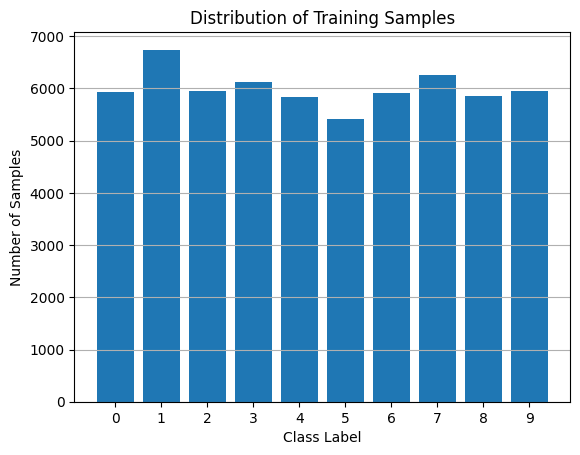

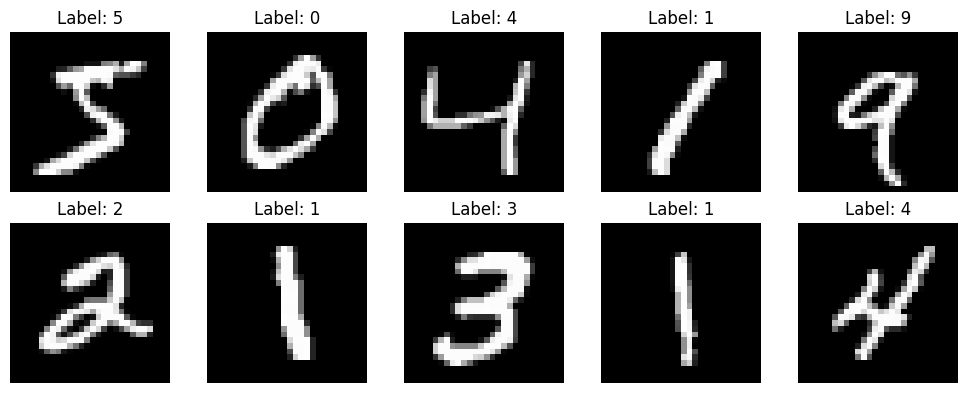

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8811 - loss: 0.3945 - val_accuracy: 0.9500 - val_loss: 0.1628
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9699 - loss: 0.0984 - val_accuracy: 0.9710 - val_loss: 0.1004
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9802 - loss: 0.0645 - val_accuracy: 0.9652 - val_loss: 0.1225
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9856 - loss: 0.0437 - val_accuracy: 0.9740 - val_loss: 0.0967
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9894 - loss: 0.0349 - val_accuracy: 0.9628 - val_loss: 0.1456
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9890 - loss: 0.0341 - val_accuracy: 0.9630 - val_loss: 0.1600
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9685 - val_loss: 0.1266
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9930 - loss: 0.0234 - 

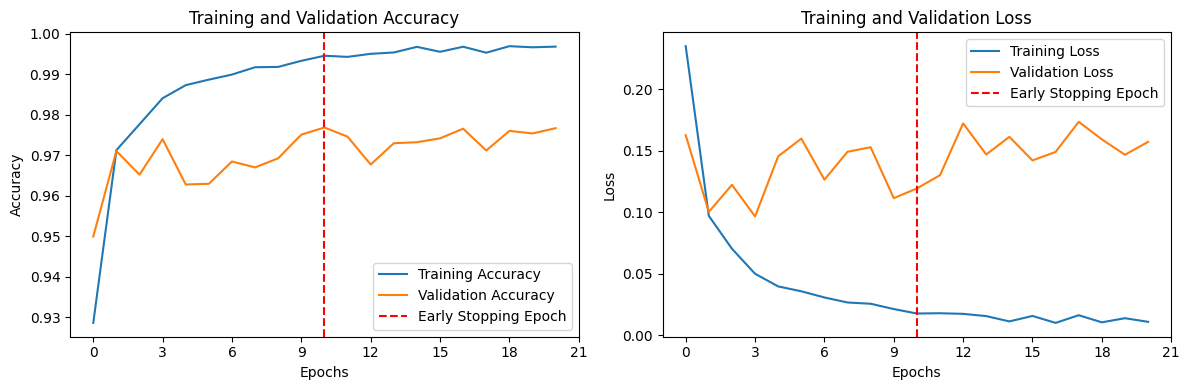

In [14]:
# ============================================
# 1. Importar dataset
# ============================================
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

# ============================================
# 2. Normalizar datos  ---->>> IMPORTANTE
#    Convertir a float32 y escalar entre 0 y 1
# ============================================
train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0

print("New min/max after normalization:", train_images.min(), train_images.max())

# ============================================
# 3. Revisar distribución de clases
# ============================================
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribution of Training Samples')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()

# ============================================
# 4. Visualizar primeras imágenes
# ============================================
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ============================================
# 5. Crear modelo Feedforward (MLP)
# ============================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# ============================================
# 6. Compilar modelo
# ============================================
opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ============================================
# 7. Early Stopping
# ============================================
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# ============================================
# 8. Entrenar modelo
# ============================================
history = model.fit(
    train_images,
    train_labels,
    epochs=50,
    validation_split=0.4,
    batch_size=32,
    callbacks=[early_stop]
)

# ============================================
# 9. Gráficas
# ============================================
from matplotlib.ticker import MaxNLocator

stopped_epoch = early_stop.stopped_epoch
best_epoch = stopped_epoch - early_stop.patience

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# === Step 2: Evaluate model on the test set ===
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Compare with validation accuracy from training
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Test Accuracy: 0.9810
Test Loss: 0.0943
Best Validation Accuracy: 0.9768


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directorio seleccionado:
/content/drive/MyDrive/ITC 5to Semestre/Inteligencia Artificial/Numeros A3.2

Archivo: 0_0.png
Predicción: 0
Digit | Probability
-------------------
  0   |   0.90538
  1   |   0.00285
  2   |   0.01473
  3   |   0.00382
  4   |   0.00434
  5   |   0.00145
  6   |   0.00776
  7   |   0.00618
  8   |   0.00366
  9   |   0.04982


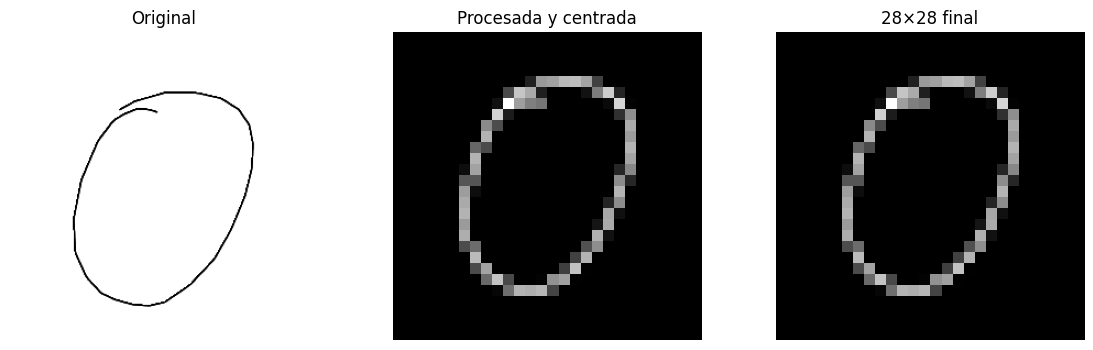


Archivo: 0_1.png
Predicción: 0
Digit | Probability
-------------------
  0   |   0.98816
  1   |   0.00019
  2   |   0.00065
  3   |   0.00043
  4   |   0.00039
  5   |   0.00051
  6   |   0.00082
  7   |   0.00102
  8   |   0.00032
  9   |   0.00751


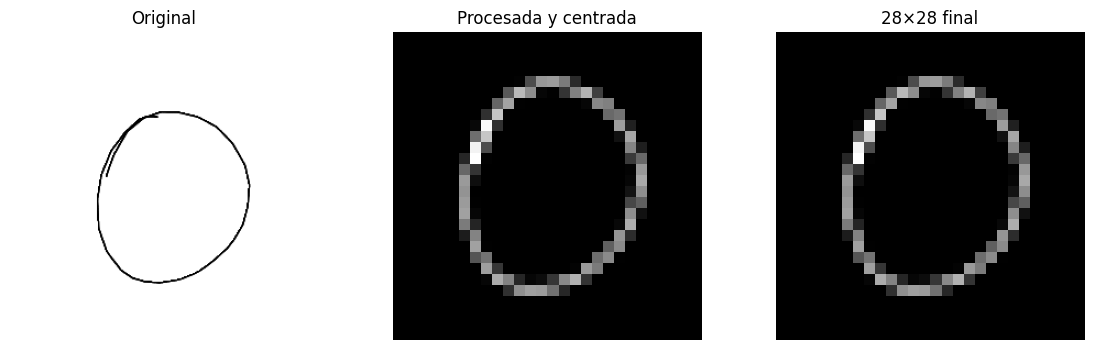


Archivo: 0_2.png
Predicción: 0
Digit | Probability
-------------------
  0   |   0.99135
  1   |   0.00013
  2   |   0.00103
  3   |   0.00048
  4   |   0.00013
  5   |   0.00014
  6   |   0.00054
  7   |   0.00033
  8   |   0.00080
  9   |   0.00506


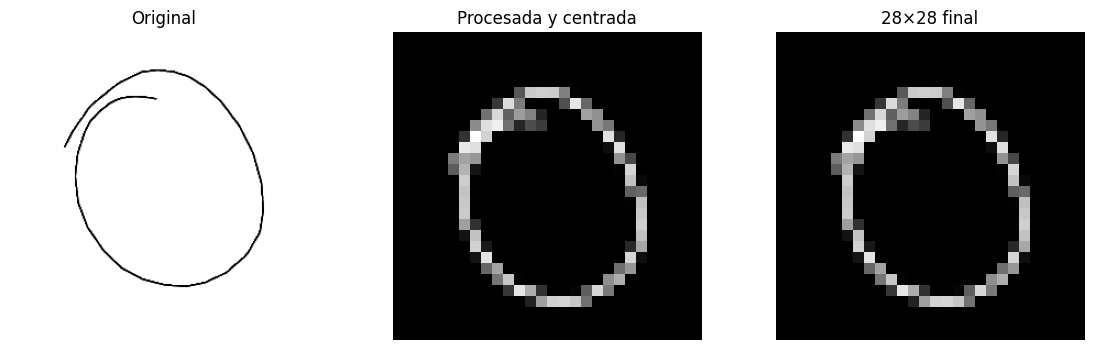


Archivo: 0_3.png
Predicción: 0
Digit | Probability
-------------------
  0   |   0.94838
  1   |   0.00108
  2   |   0.00372
  3   |   0.00187
  4   |   0.00301
  5   |   0.00146
  6   |   0.00706
  7   |   0.00429
  8   |   0.00222
  9   |   0.02689


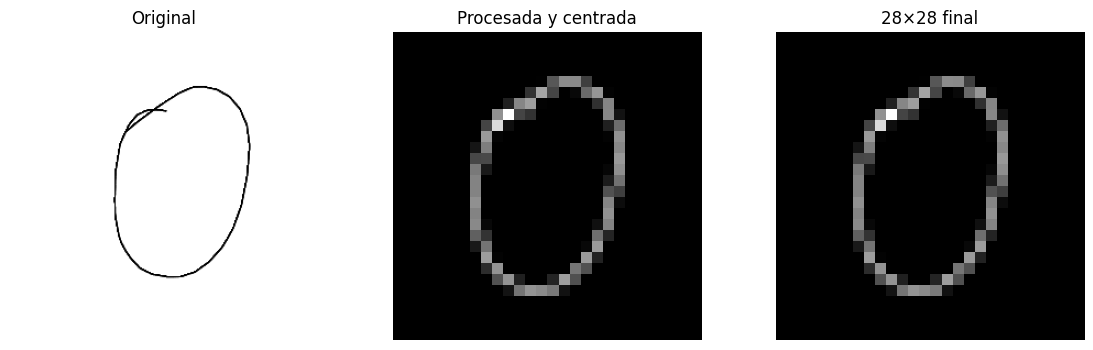


Archivo: 0_4.png
Predicción: 0
Digit | Probability
-------------------
  0   |   0.95314
  1   |   0.00139
  2   |   0.00393
  3   |   0.00249
  4   |   0.00230
  5   |   0.00261
  6   |   0.00662
  7   |   0.00402
  8   |   0.00297
  9   |   0.02052


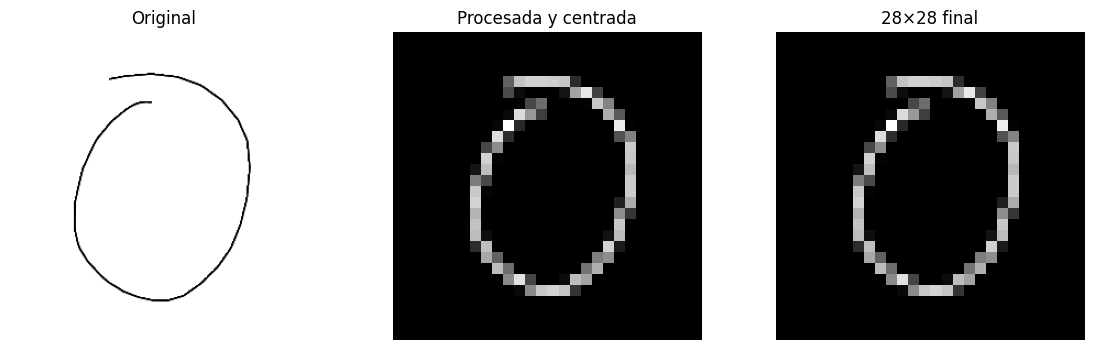


Archivo: 0_5.png
Predicción: 0
Digit | Probability
-------------------
  0   |   0.99997
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00002
  8   |   0.00000
  9   |   0.00001


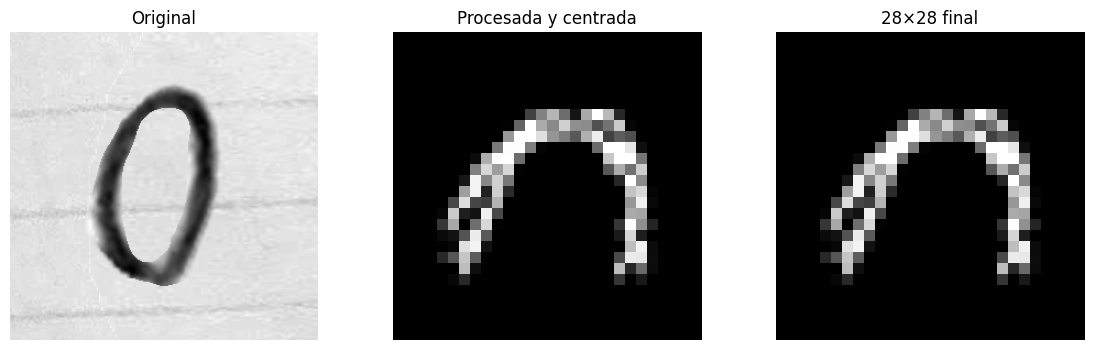


Archivo: 1_0.png
Predicción: 1
Digit | Probability
-------------------
  0   |   0.00380
  1   |   0.77216
  2   |   0.00730
  3   |   0.00330
  4   |   0.13447
  5   |   0.00253
  6   |   0.00724
  7   |   0.01367
  8   |   0.01261
  9   |   0.04293


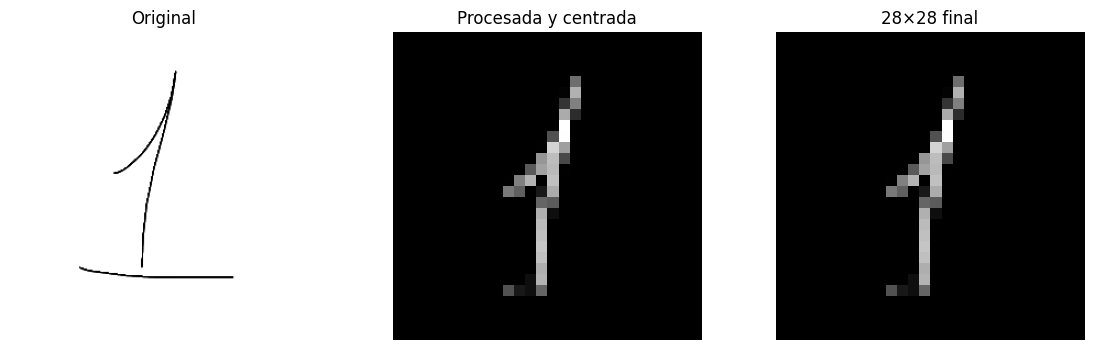


Archivo: 1_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.03371
  1   |   0.04274
  2   |   0.04323
  3   |   0.08437
  4   |   0.04515
  5   |   0.24757
  6   |   0.06470
  7   |   0.02617
  8   |   0.34628
  9   |   0.06609


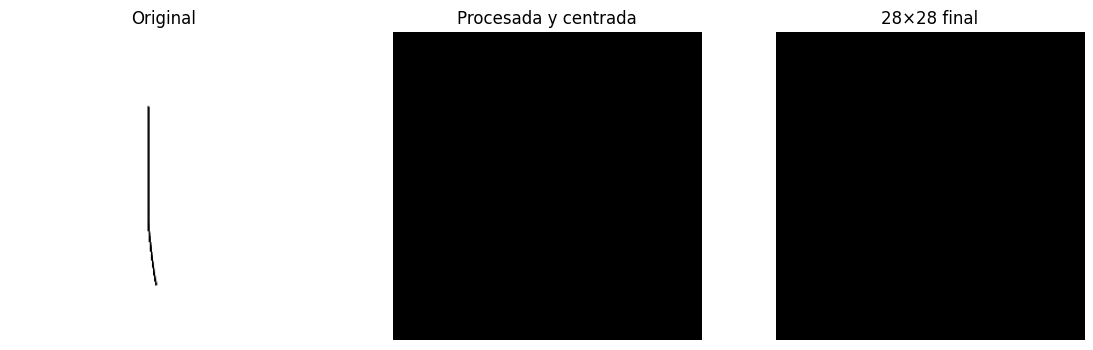


Archivo: 1_2.png
Predicción: 2
Digit | Probability
-------------------
  0   |   0.00534
  1   |   0.17477
  2   |   0.63078
  3   |   0.04656
  4   |   0.00756
  5   |   0.00889
  6   |   0.02351
  7   |   0.01686
  8   |   0.08212
  9   |   0.00362


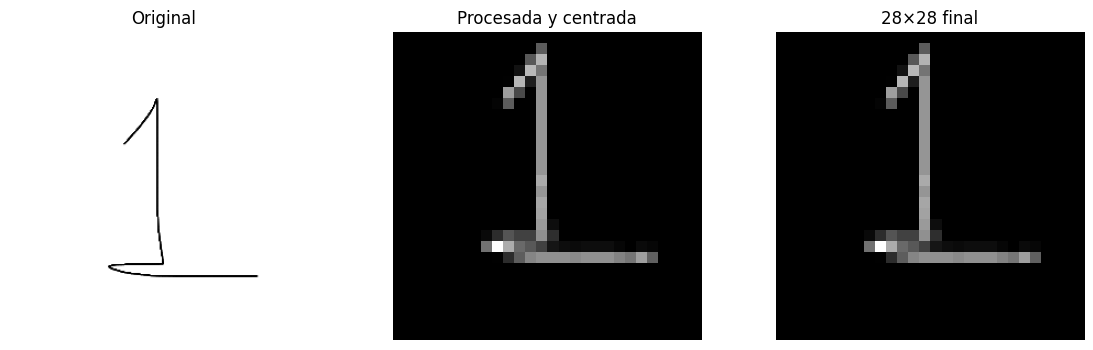


Archivo: 1_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.03371
  1   |   0.04274
  2   |   0.04323
  3   |   0.08437
  4   |   0.04515
  5   |   0.24757
  6   |   0.06470
  7   |   0.02617
  8   |   0.34628
  9   |   0.06609


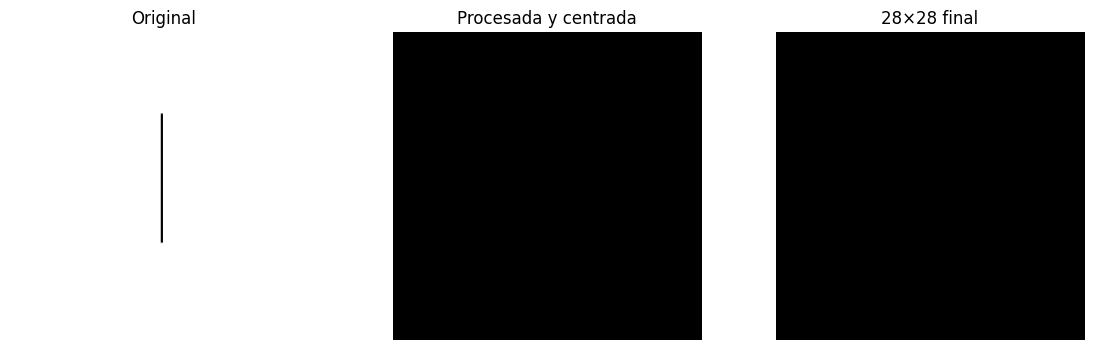


Archivo: 1_4.png
Predicción: 1
Digit | Probability
-------------------
  0   |   0.00007
  1   |   0.98843
  2   |   0.00284
  3   |   0.00029
  4   |   0.00025
  5   |   0.00156
  6   |   0.00432
  7   |   0.00040
  8   |   0.00151
  9   |   0.00034


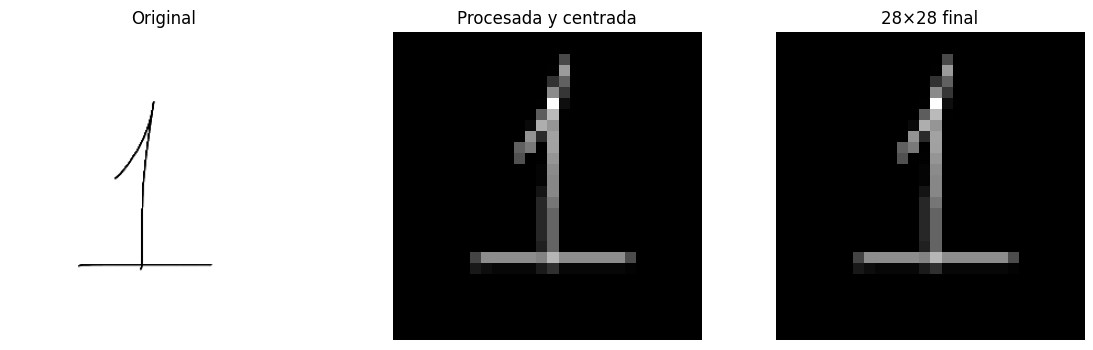


Archivo: 1_5.png
Predicción: 1
Digit | Probability
-------------------
  0   |   0.00013
  1   |   0.99898
  2   |   0.00034
  3   |   0.00000
  4   |   0.00005
  5   |   0.00000
  6   |   0.00030
  7   |   0.00008
  8   |   0.00009
  9   |   0.00004


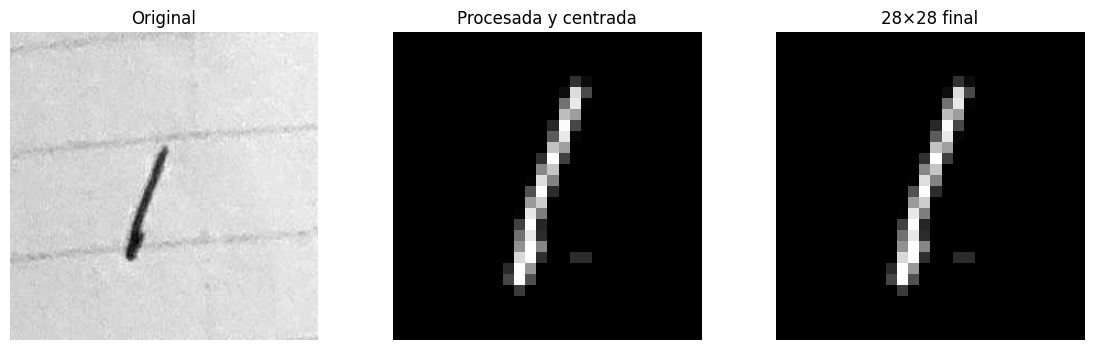


Archivo: 2_0.png
Predicción: 2
Digit | Probability
-------------------
  0   |   0.01905
  1   |   0.04871
  2   |   0.86061
  3   |   0.01925
  4   |   0.00481
  5   |   0.00638
  6   |   0.00886
  7   |   0.01147
  8   |   0.01126
  9   |   0.00960


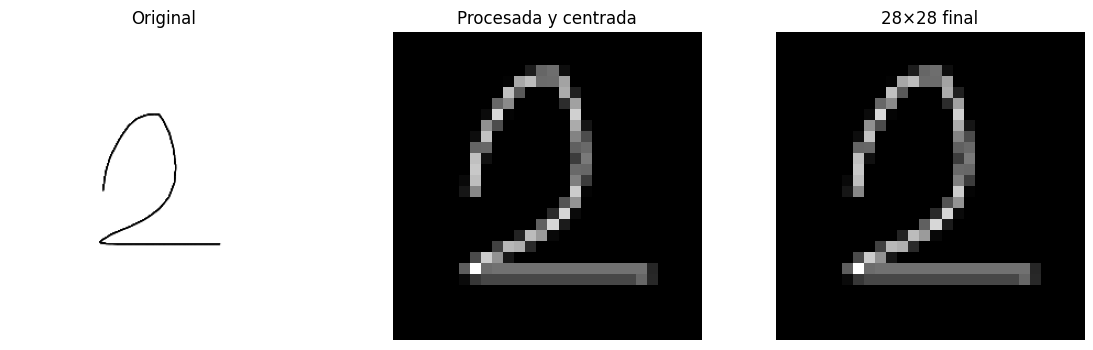


Archivo: 2_1.png
Predicción: 2
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00004
  2   |   0.99991
  3   |   0.00003
  4   |   0.00001
  5   |   0.00000
  6   |   0.00000
  7   |   0.00001
  8   |   0.00000
  9   |   0.00000


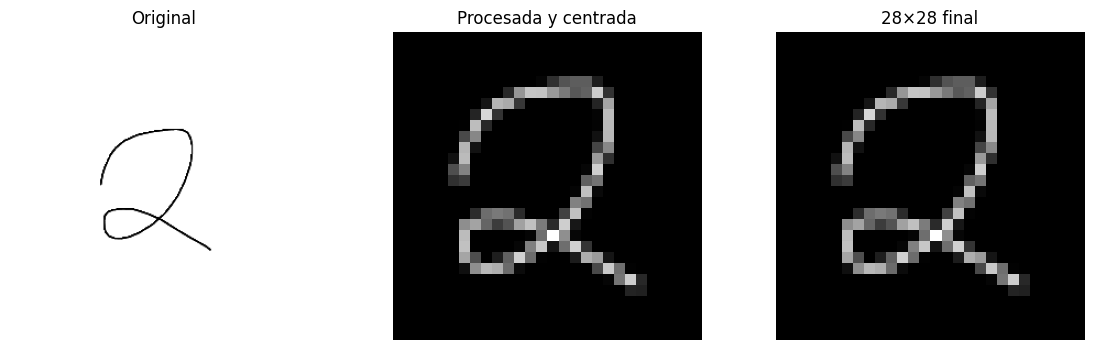


Archivo: 2_2.png
Predicción: 2
Digit | Probability
-------------------
  0   |   0.06909
  1   |   0.01584
  2   |   0.82246
  3   |   0.02797
  4   |   0.00136
  5   |   0.00518
  6   |   0.00647
  7   |   0.00671
  8   |   0.03917
  9   |   0.00574


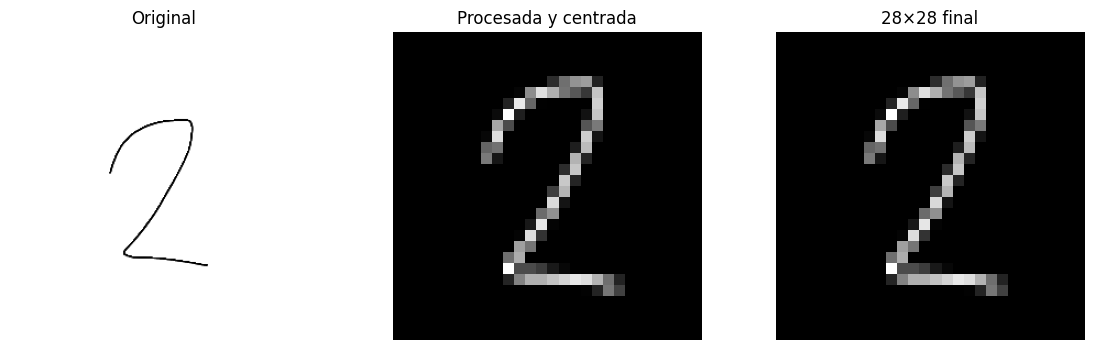


Archivo: 2_3.png
Predicción: 2
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00005
  2   |   0.99994
  3   |   0.00001
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000


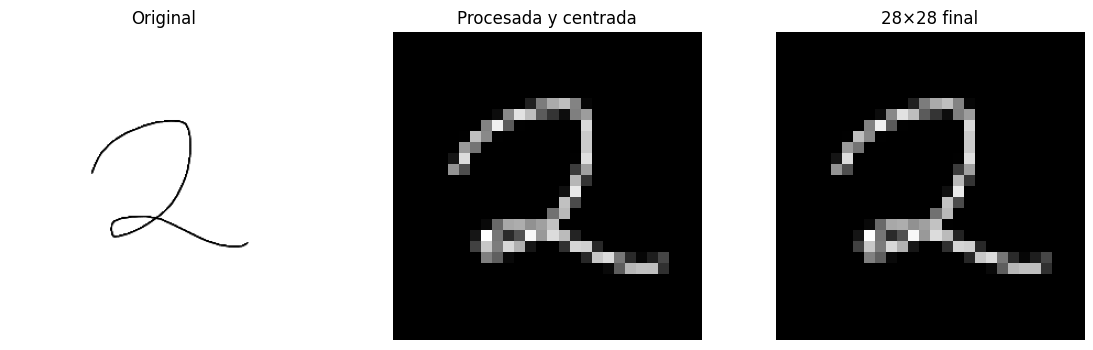


Archivo: 2_4.png
Predicción: 2
Digit | Probability
-------------------
  0   |   0.03911
  1   |   0.03918
  2   |   0.75091
  3   |   0.04949
  4   |   0.00872
  5   |   0.01028
  6   |   0.01247
  7   |   0.02111
  8   |   0.05473
  9   |   0.01400


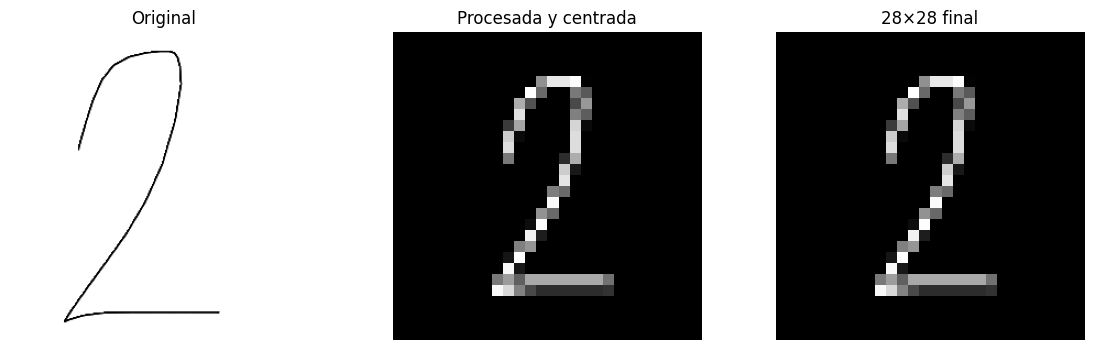


Archivo: 2_5.png
Predicción: 2
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.99908
  3   |   0.00008
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00083
  9   |   0.00000


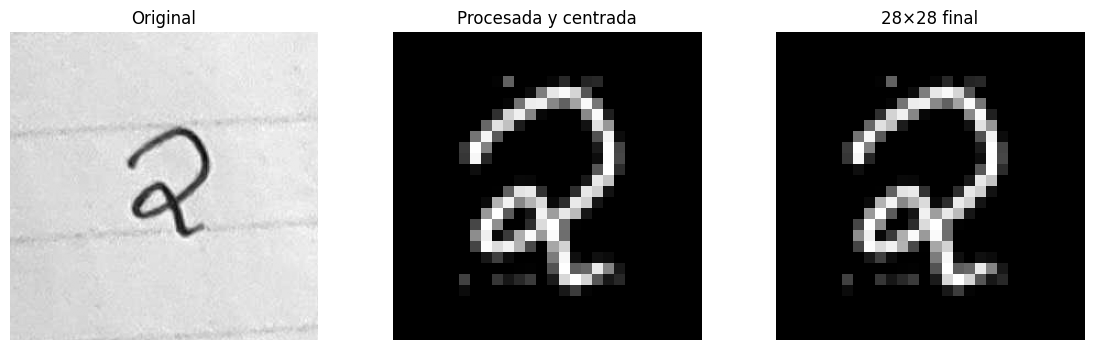


Archivo: 3_0.png
Predicción: 3
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00001
  3   |   0.99998
  4   |   0.00000
  5   |   0.00001
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000


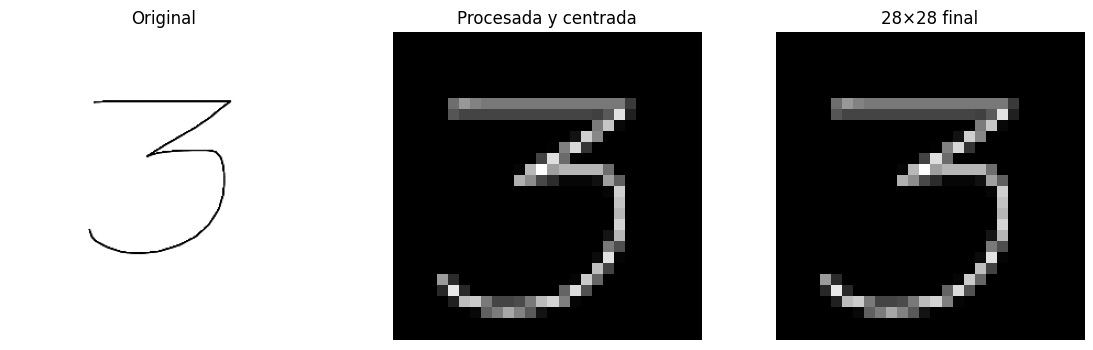


Archivo: 3_1.png
Predicción: 3
Digit | Probability
-------------------
  0   |   0.00269
  1   |   0.01716
  2   |   0.00968
  3   |   0.60715
  4   |   0.00518
  5   |   0.06369
  6   |   0.00145
  7   |   0.00829
  8   |   0.13055
  9   |   0.15417


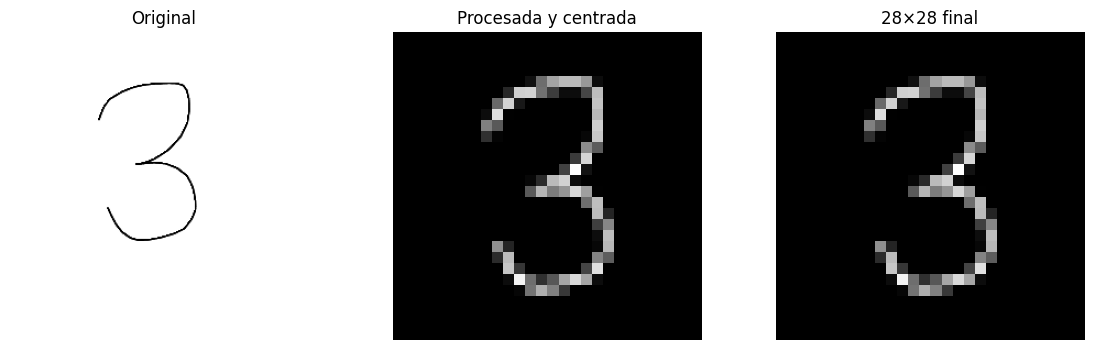


Archivo: 3_2.png
Predicción: 3
Digit | Probability
-------------------
  0   |   0.00013
  1   |   0.00046
  2   |   0.00142
  3   |   0.67206
  4   |   0.00017
  5   |   0.31670
  6   |   0.00010
  7   |   0.00052
  8   |   0.00390
  9   |   0.00455


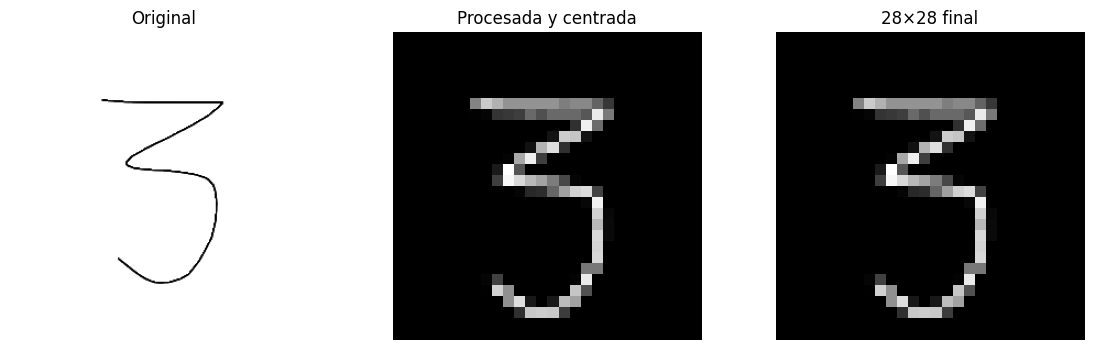


Archivo: 3_3.png
Predicción: 3
Digit | Probability
-------------------
  0   |   0.00077
  1   |   0.01005
  2   |   0.01129
  3   |   0.92877
  4   |   0.00202
  5   |   0.01006
  6   |   0.00031
  7   |   0.00412
  8   |   0.01677
  9   |   0.01583


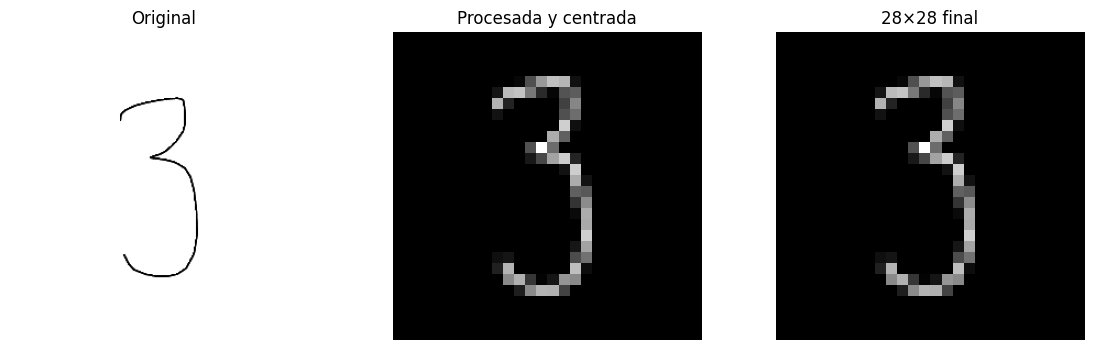


Archivo: 3_4.png
Predicción: 3
Digit | Probability
-------------------
  0   |   0.00047
  1   |   0.00113
  2   |   0.00237
  3   |   0.49661
  4   |   0.00049
  5   |   0.47268
  6   |   0.00039
  7   |   0.00110
  8   |   0.01243
  9   |   0.01232


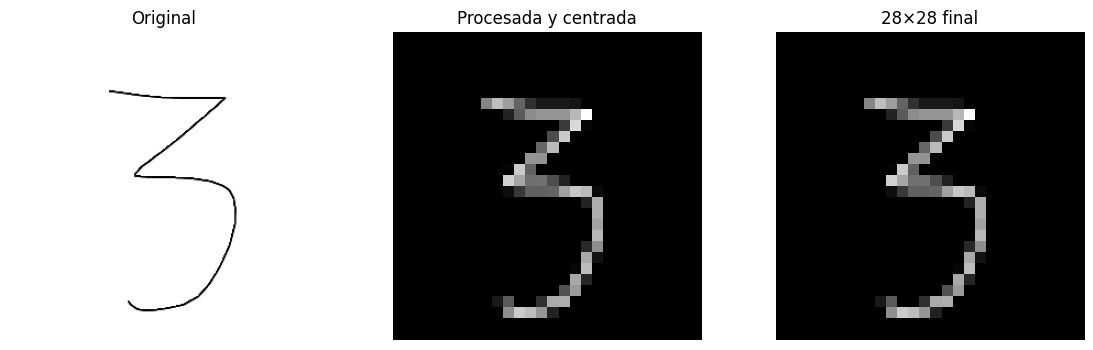


Archivo: 3_5.png
Predicción: 3
Digit | Probability
-------------------
  0   |   0.00003
  1   |   0.00121
  2   |   0.00113
  3   |   0.96771
  4   |   0.00001
  5   |   0.00597
  6   |   0.00001
  7   |   0.00403
  8   |   0.00013
  9   |   0.01977


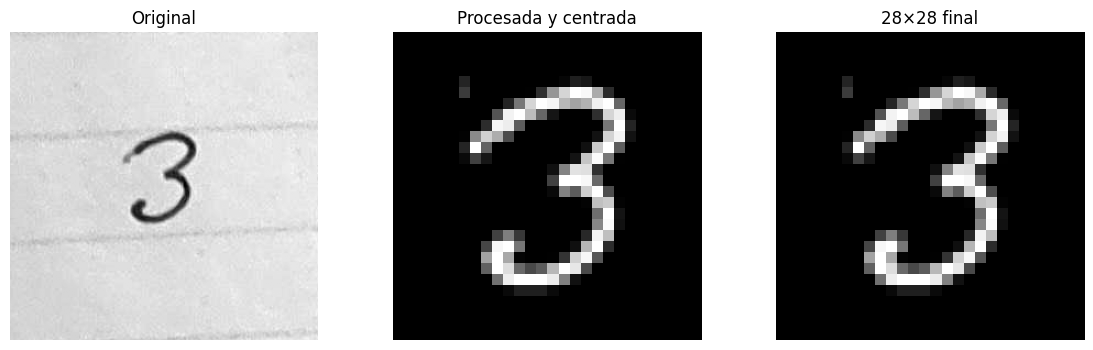


Archivo: 4_0.png
Predicción: 4
Digit | Probability
-------------------
  0   |   0.00042
  1   |   0.00175
  2   |   0.00074
  3   |   0.00010
  4   |   0.97322
  5   |   0.00110
  6   |   0.00059
  7   |   0.00221
  8   |   0.00089
  9   |   0.01897


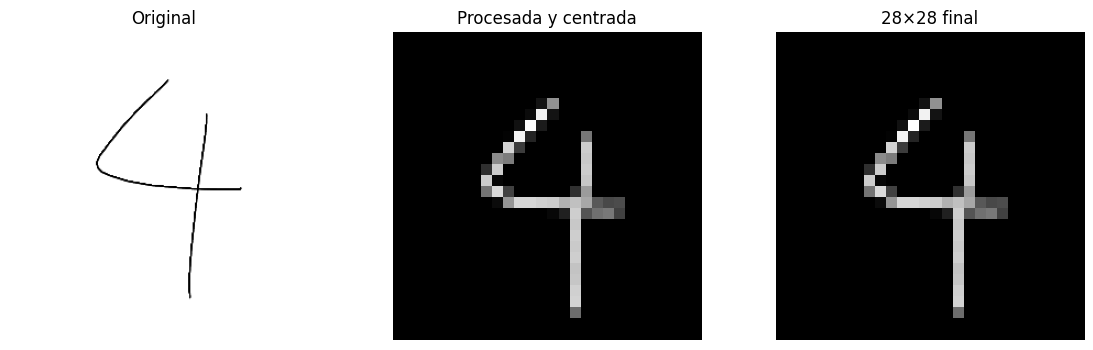


Archivo: 4_1.png
Predicción: 4
Digit | Probability
-------------------
  0   |   0.00003
  1   |   0.00018
  2   |   0.00013
  3   |   0.00001
  4   |   0.99216
  5   |   0.00014
  6   |   0.00006
  7   |   0.00033
  8   |   0.00004
  9   |   0.00693


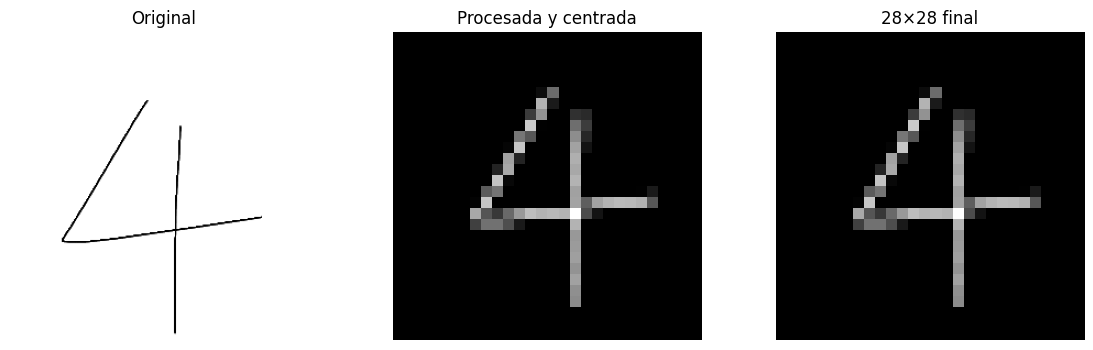


Archivo: 4_2.png
Predicción: 4
Digit | Probability
-------------------
  0   |   0.00002
  1   |   0.00017
  2   |   0.00003
  3   |   0.00001
  4   |   0.99361
  5   |   0.00013
  6   |   0.00007
  7   |   0.00024
  8   |   0.00010
  9   |   0.00562


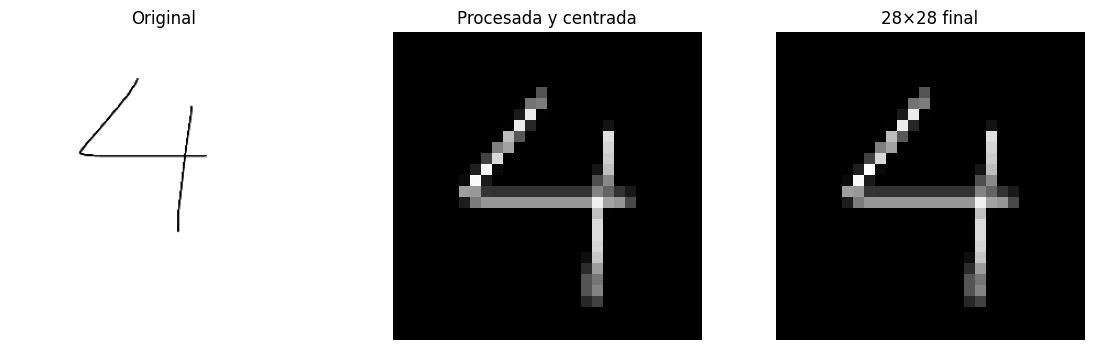


Archivo: 4_3.png
Predicción: 4
Digit | Probability
-------------------
  0   |   0.00005
  1   |   0.00031
  2   |   0.00007
  3   |   0.00001
  4   |   0.99259
  5   |   0.00018
  6   |   0.00009
  7   |   0.00050
  8   |   0.00014
  9   |   0.00607


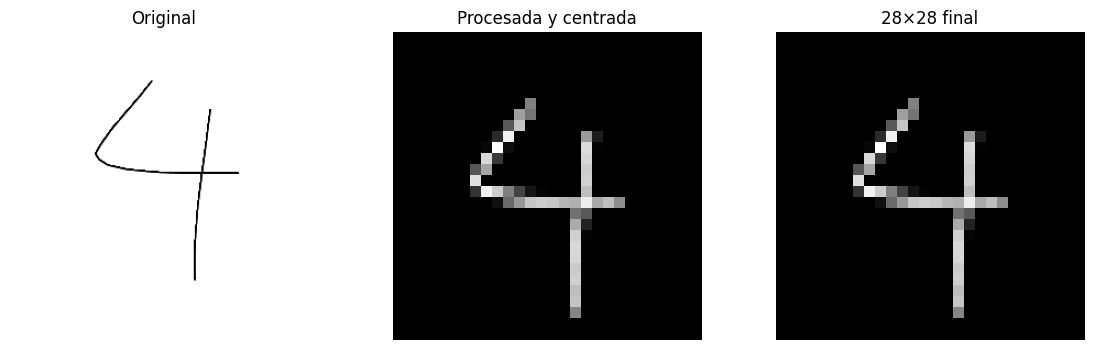


Archivo: 4_4.png
Predicción: 4
Digit | Probability
-------------------
  0   |   0.00025
  1   |   0.00130
  2   |   0.00061
  3   |   0.00006
  4   |   0.98063
  5   |   0.00076
  6   |   0.00097
  7   |   0.00202
  8   |   0.00050
  9   |   0.01290


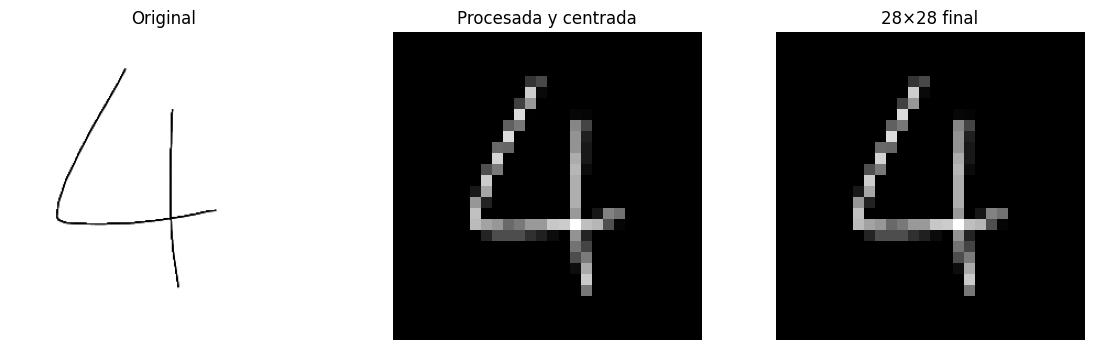


Archivo: 4_5.png
Predicción: 4
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.99999
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000


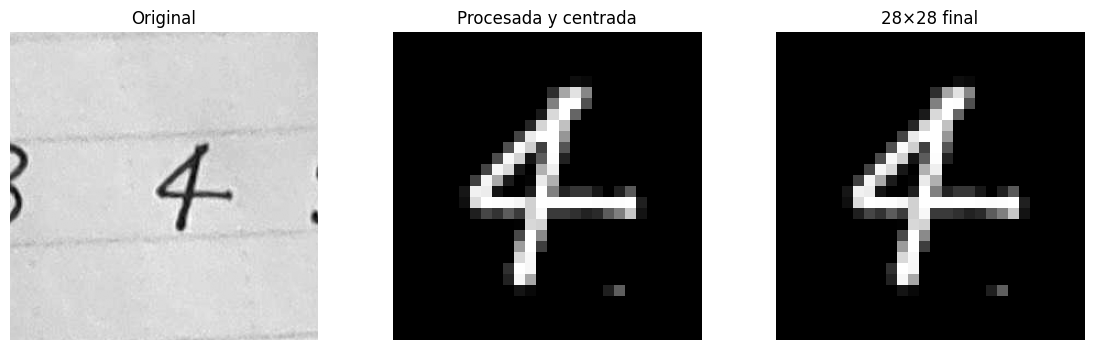


Archivo: 5_0.png
Predicción: 5
Digit | Probability
-------------------
  0   |   0.00022
  1   |   0.00031
  2   |   0.00013
  3   |   0.01364
  4   |   0.00059
  5   |   0.97129
  6   |   0.00070
  7   |   0.00009
  8   |   0.00559
  9   |   0.00744


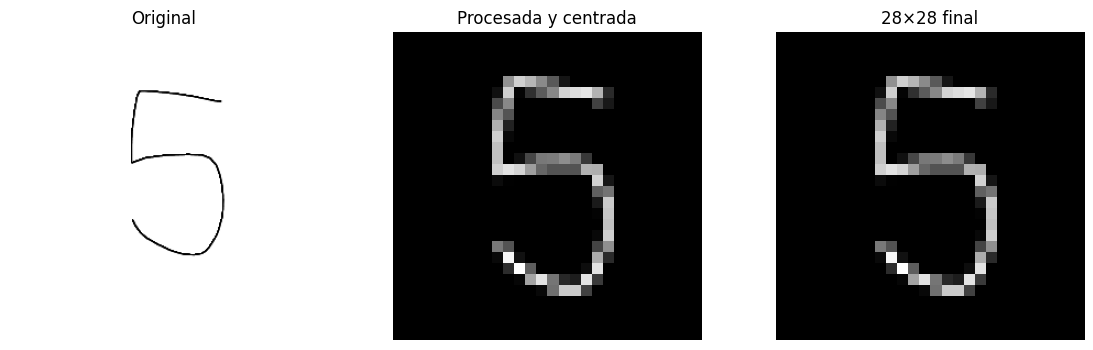


Archivo: 5_1.png
Predicción: 5
Digit | Probability
-------------------
  0   |   0.00011
  1   |   0.00017
  2   |   0.00014
  3   |   0.04139
  4   |   0.00009
  5   |   0.95386
  6   |   0.00021
  7   |   0.00007
  8   |   0.00164
  9   |   0.00232


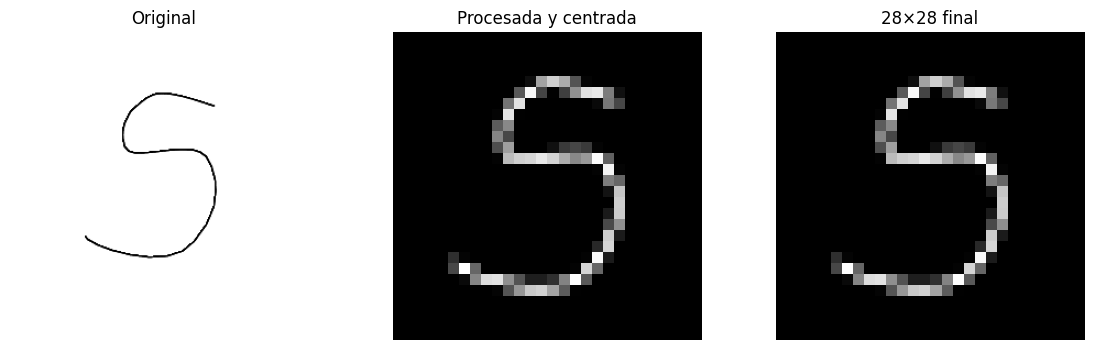


Archivo: 5_2.png
Predicción: 5
Digit | Probability
-------------------
  0   |   0.01677
  1   |   0.01700
  2   |   0.01793
  3   |   0.15978
  4   |   0.00683
  5   |   0.66634
  6   |   0.01051
  7   |   0.02301
  8   |   0.03529
  9   |   0.04653


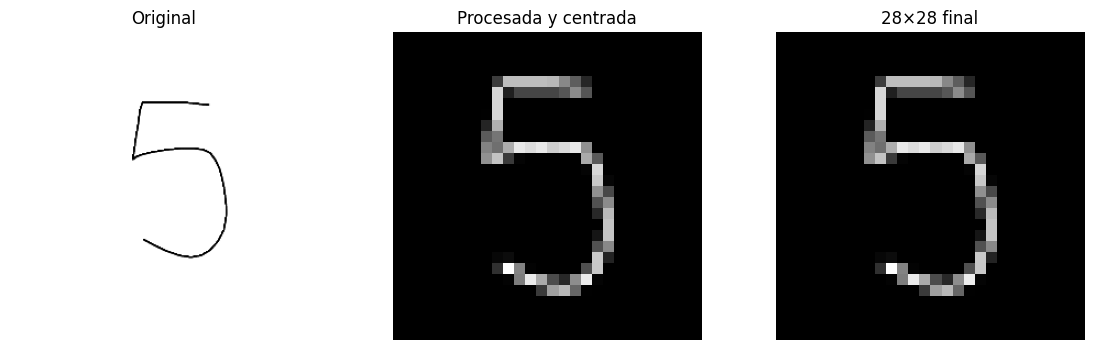


Archivo: 5_3.png
Predicción: 3
Digit | Probability
-------------------
  0   |   0.00668
  1   |   0.01335
  2   |   0.02537
  3   |   0.49797
  4   |   0.00337
  5   |   0.39764
  6   |   0.00527
  7   |   0.00741
  8   |   0.02409
  9   |   0.01884


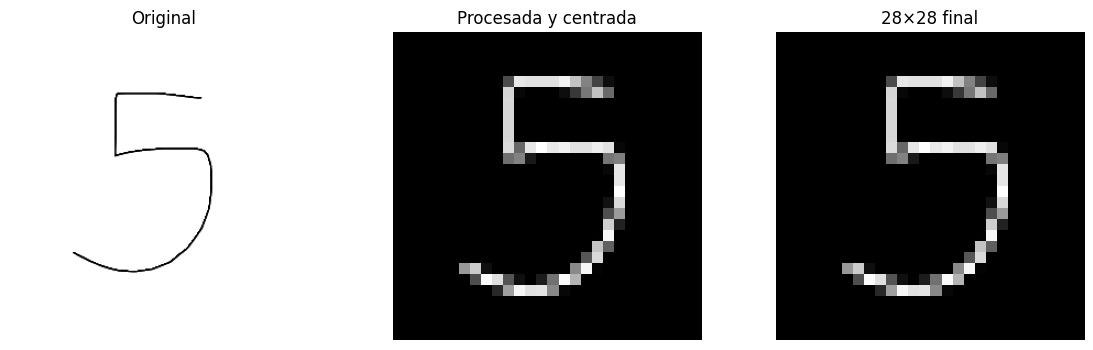


Archivo: 5_4.png
Predicción: 5
Digit | Probability
-------------------
  0   |   0.00009
  1   |   0.00015
  2   |   0.00013
  3   |   0.02969
  4   |   0.00027
  5   |   0.95745
  6   |   0.00029
  7   |   0.00011
  8   |   0.00188
  9   |   0.00995


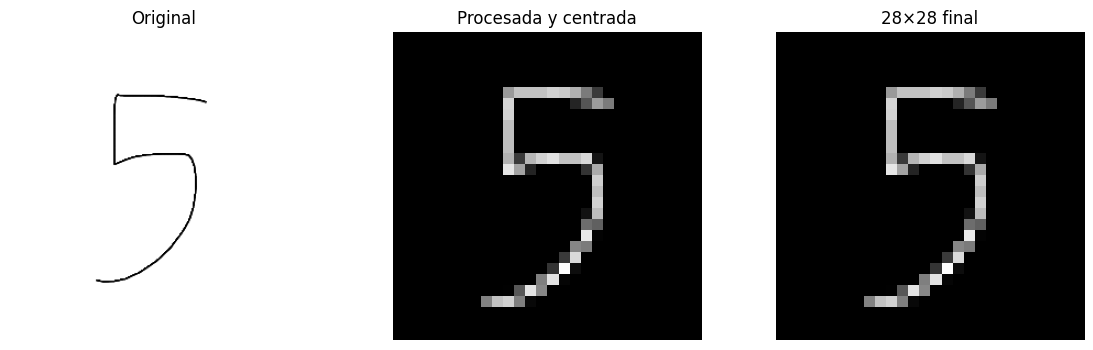


Archivo: 5_5.png
Predicción: 5
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   1.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000


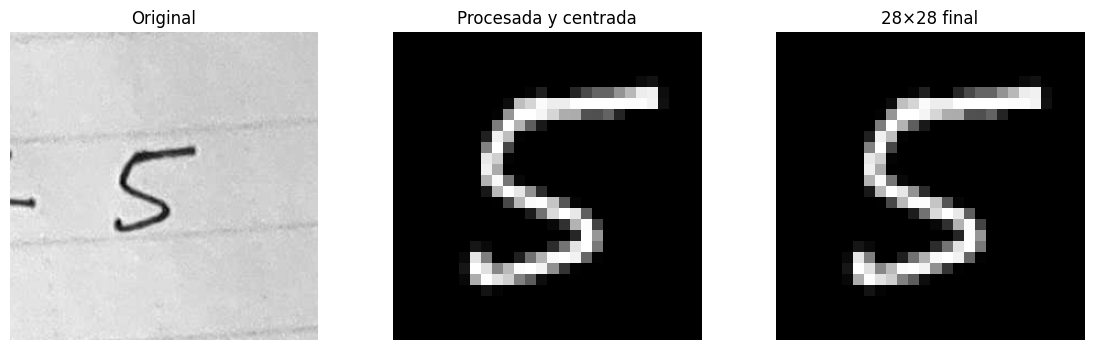


Archivo: 6_0.png
Predicción: 6
Digit | Probability
-------------------
  0   |   0.07865
  1   |   0.02376
  2   |   0.00859
  3   |   0.00800
  4   |   0.05045
  5   |   0.12998
  6   |   0.52785
  7   |   0.00398
  8   |   0.13529
  9   |   0.03346


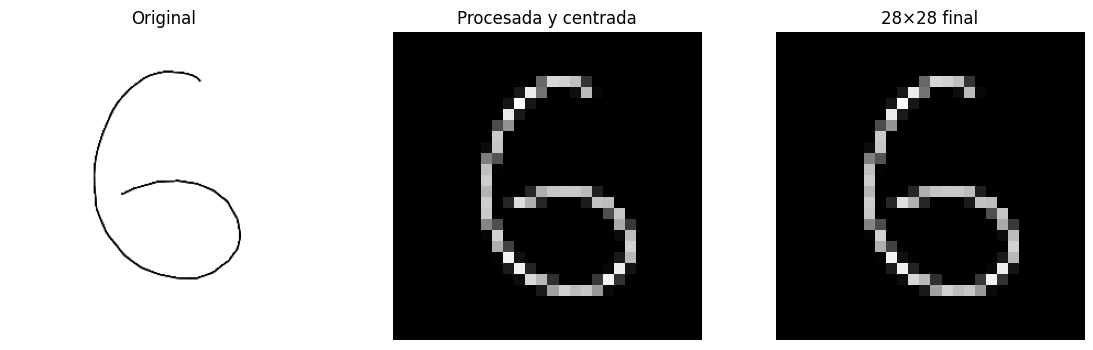


Archivo: 6_1.png
Predicción: 6
Digit | Probability
-------------------
  0   |   0.05922
  1   |   0.01008
  2   |   0.00245
  3   |   0.01012
  4   |   0.02025
  5   |   0.12242
  6   |   0.74142
  7   |   0.00469
  8   |   0.01417
  9   |   0.01518


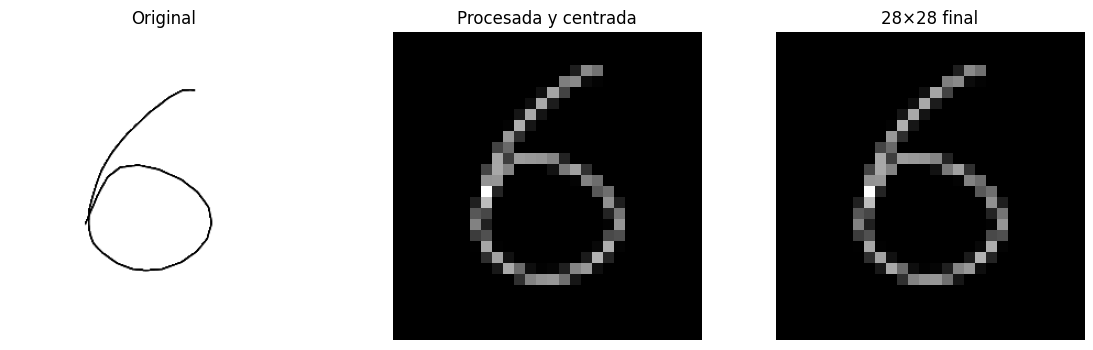


Archivo: 6_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.00879
  1   |   0.02827
  2   |   0.00494
  3   |   0.01387
  4   |   0.01000
  5   |   0.25106
  6   |   0.20980
  7   |   0.00337
  8   |   0.45211
  9   |   0.01778


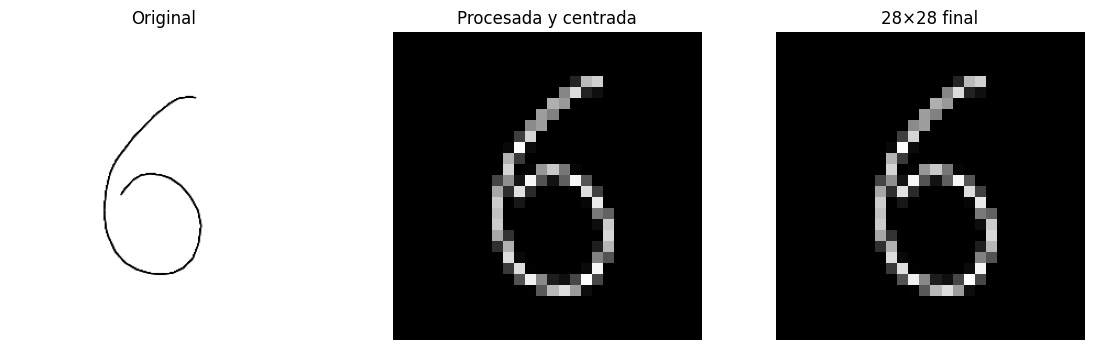


Archivo: 6_3.png
Predicción: 6
Digit | Probability
-------------------
  0   |   0.00388
  1   |   0.00182
  2   |   0.00025
  3   |   0.00042
  4   |   0.00248
  5   |   0.01510
  6   |   0.96248
  7   |   0.00005
  8   |   0.01226
  9   |   0.00126


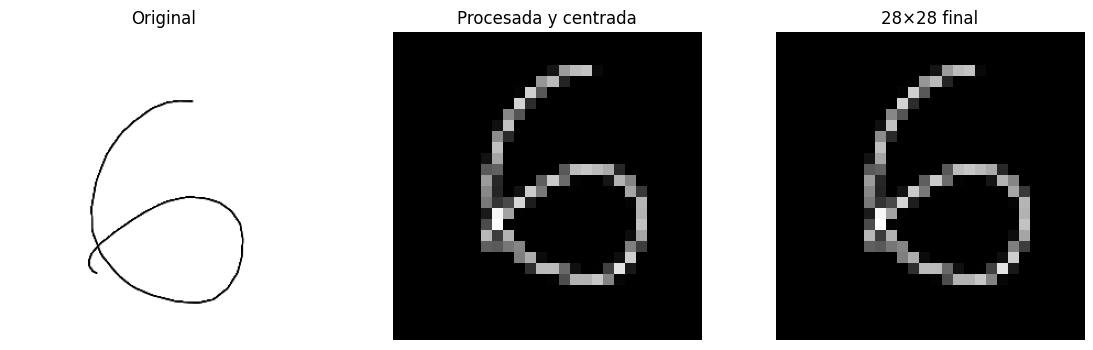


Archivo: 6_4.png
Predicción: 6
Digit | Probability
-------------------
  0   |   0.12059
  1   |   0.00788
  2   |   0.01025
  3   |   0.00260
  4   |   0.01198
  5   |   0.02972
  6   |   0.76176
  7   |   0.00097
  8   |   0.03459
  9   |   0.01967


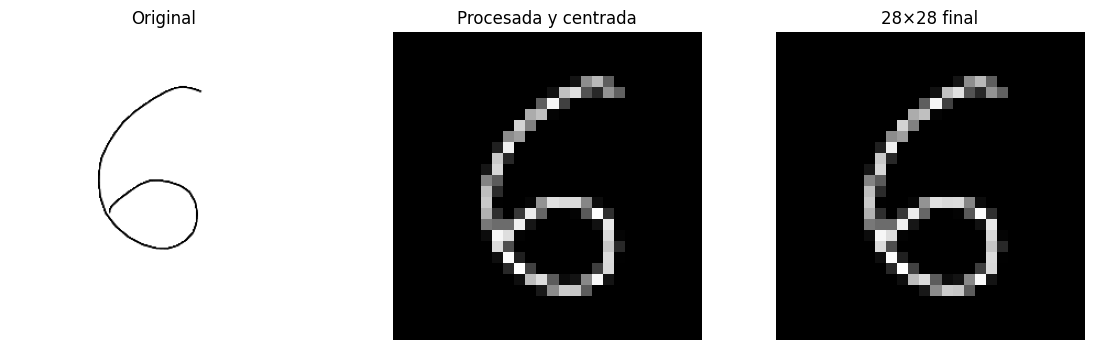


Archivo: 6_5.png
Predicción: 6
Digit | Probability
-------------------
  0   |   0.00031
  1   |   0.00001
  2   |   0.00017
  3   |   0.00006
  4   |   0.00067
  5   |   0.00010
  6   |   0.99778
  7   |   0.00003
  8   |   0.00061
  9   |   0.00025


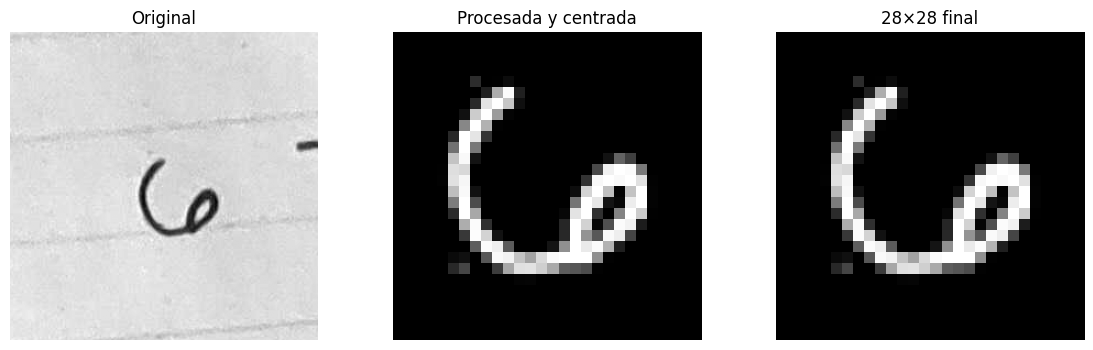


Archivo: 7_0.png
Predicción: 7
Digit | Probability
-------------------
  0   |   0.00026
  1   |   0.00452
  2   |   0.01144
  3   |   0.01403
  4   |   0.00225
  5   |   0.00061
  6   |   0.00018
  7   |   0.93708
  8   |   0.00344
  9   |   0.02618


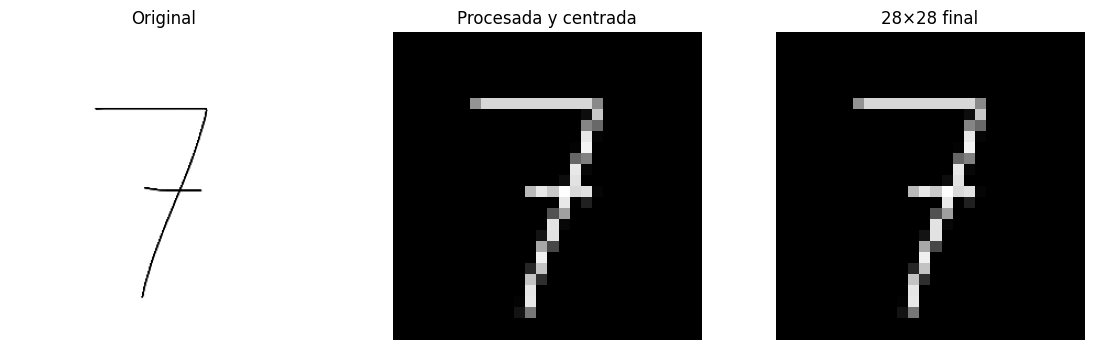


Archivo: 7_1.png
Predicción: 7
Digit | Probability
-------------------
  0   |   0.00020
  1   |   0.00254
  2   |   0.01769
  3   |   0.01468
  4   |   0.00095
  5   |   0.00045
  6   |   0.00013
  7   |   0.94687
  8   |   0.00630
  9   |   0.01019


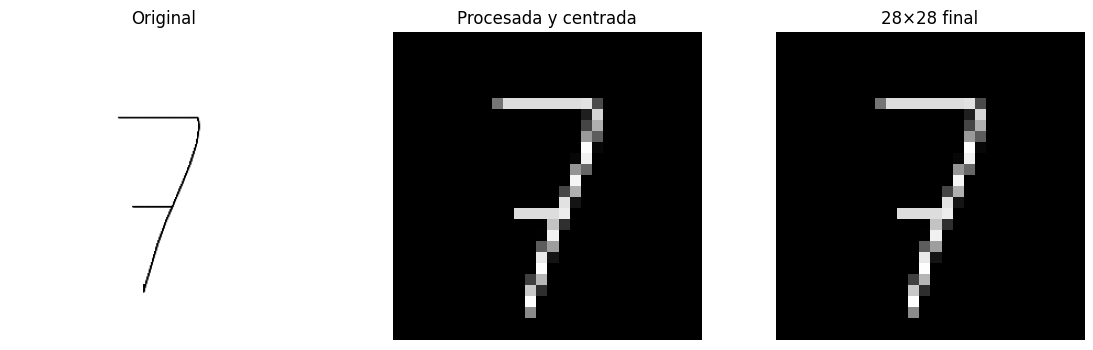


Archivo: 7_2.png
Predicción: 7
Digit | Probability
-------------------
  0   |   0.00026
  1   |   0.00301
  2   |   0.00446
  3   |   0.00800
  4   |   0.00053
  5   |   0.00084
  6   |   0.00010
  7   |   0.97111
  8   |   0.00828
  9   |   0.00341


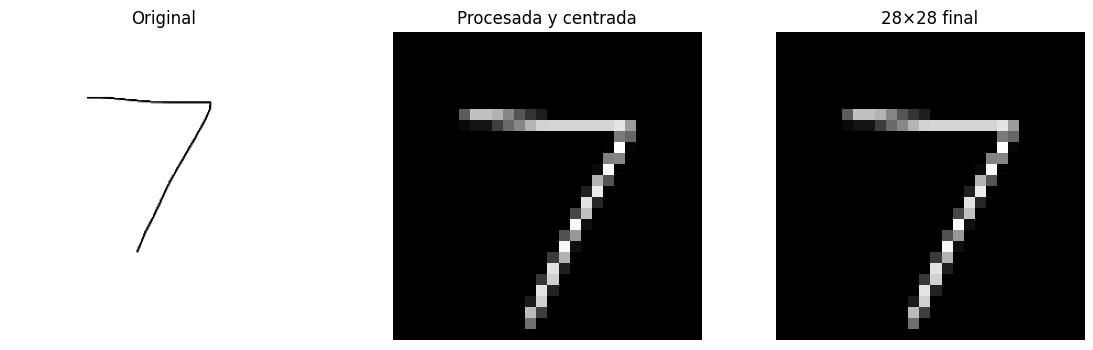


Archivo: 7_3.png
Predicción: 7
Digit | Probability
-------------------
  0   |   0.00038
  1   |   0.00411
  2   |   0.00724
  3   |   0.00505
  4   |   0.00129
  5   |   0.00063
  6   |   0.00013
  7   |   0.96086
  8   |   0.00262
  9   |   0.01769


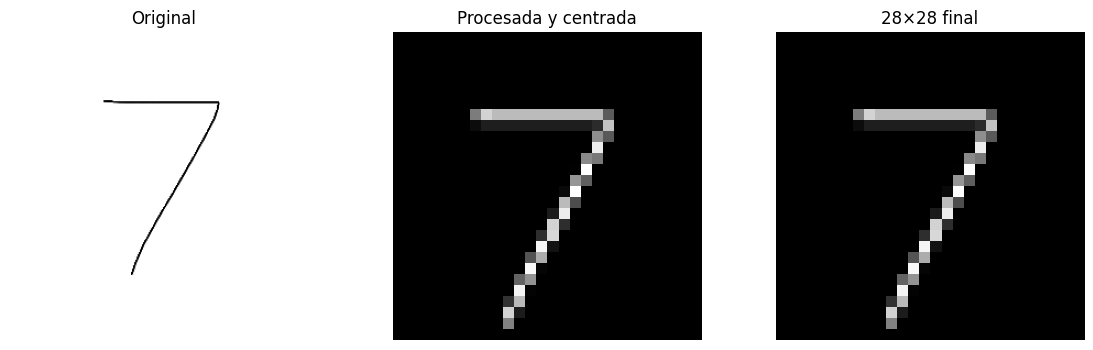


Archivo: 7_4.png
Predicción: 7
Digit | Probability
-------------------
  0   |   0.00023
  1   |   0.00578
  2   |   0.00427
  3   |   0.05319
  4   |   0.00121
  5   |   0.00261
  6   |   0.00013
  7   |   0.89411
  8   |   0.00422
  9   |   0.03426


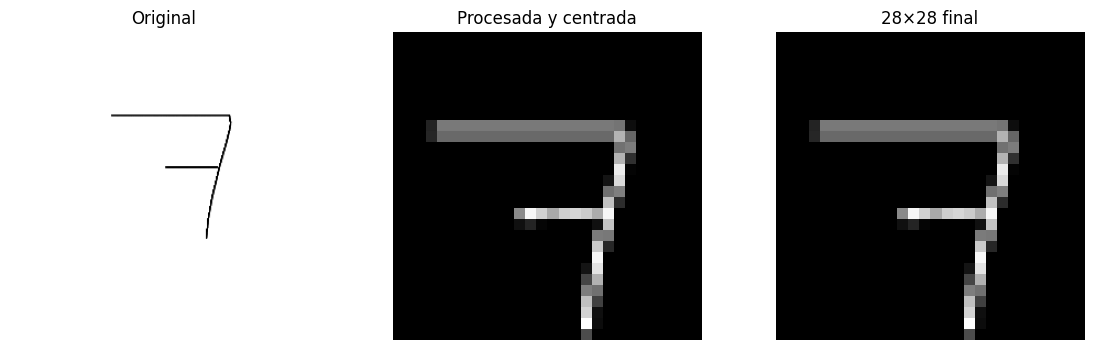


Archivo: 7_5.png
Predicción: 7
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   1.00000
  8   |   0.00000
  9   |   0.00000


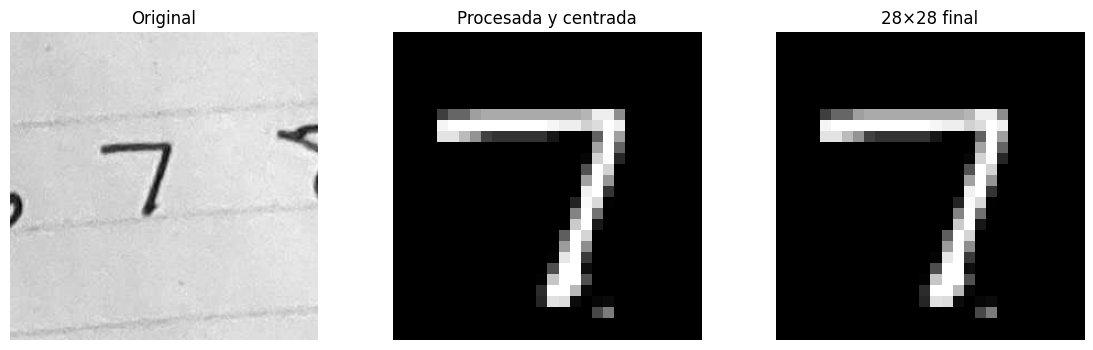


Archivo: 8_0.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00002
  2   |   0.00000
  3   |   0.00013
  4   |   0.00000
  5   |   0.00002
  6   |   0.00000
  7   |   0.00000
  8   |   0.99982
  9   |   0.00000


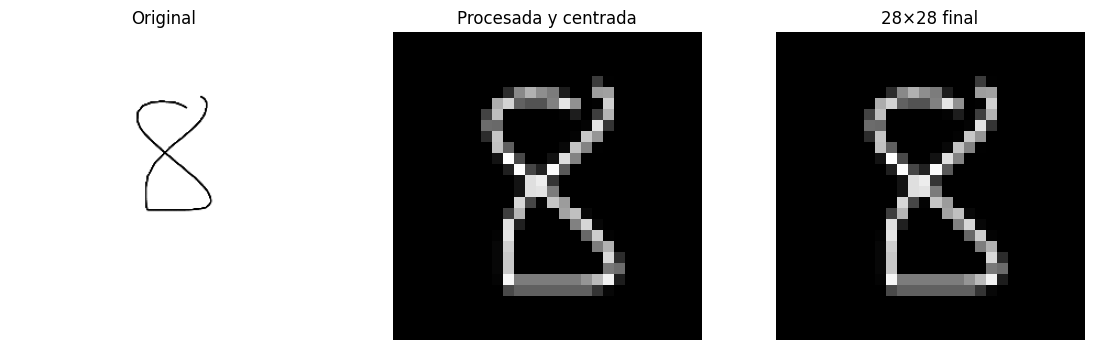


Archivo: 8_1.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00005
  2   |   0.00000
  3   |   0.00036
  4   |   0.00000
  5   |   0.00021
  6   |   0.00000
  7   |   0.00000
  8   |   0.99931
  9   |   0.00005


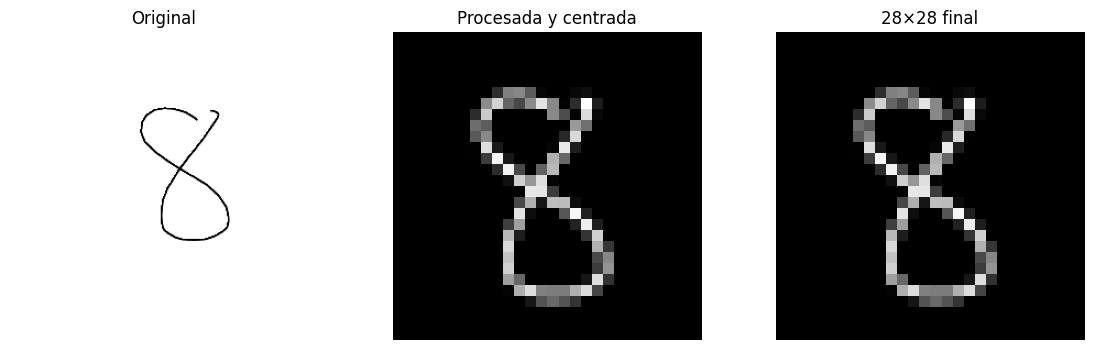


Archivo: 8_2.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.00034
  1   |   0.00351
  2   |   0.00263
  3   |   0.02418
  4   |   0.00054
  5   |   0.00809
  6   |   0.00091
  7   |   0.00051
  8   |   0.95740
  9   |   0.00188


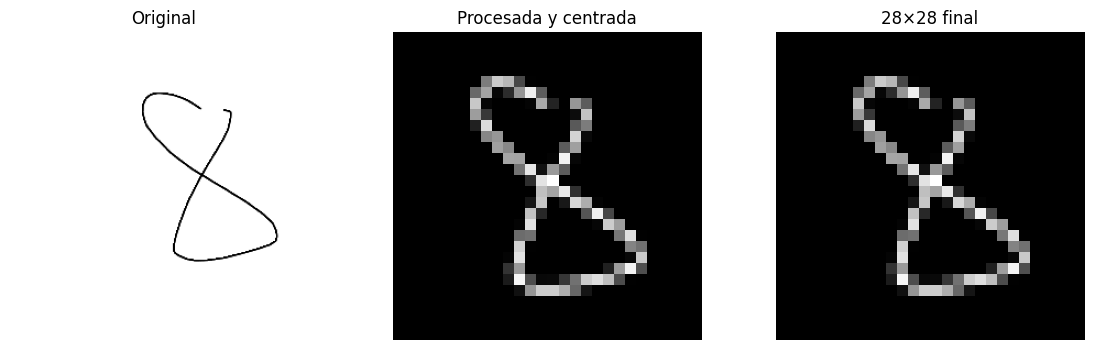


Archivo: 8_3.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.00002
  1   |   0.00051
  2   |   0.00010
  3   |   0.00096
  4   |   0.00003
  5   |   0.00031
  6   |   0.00005
  7   |   0.00001
  8   |   0.99783
  9   |   0.00017


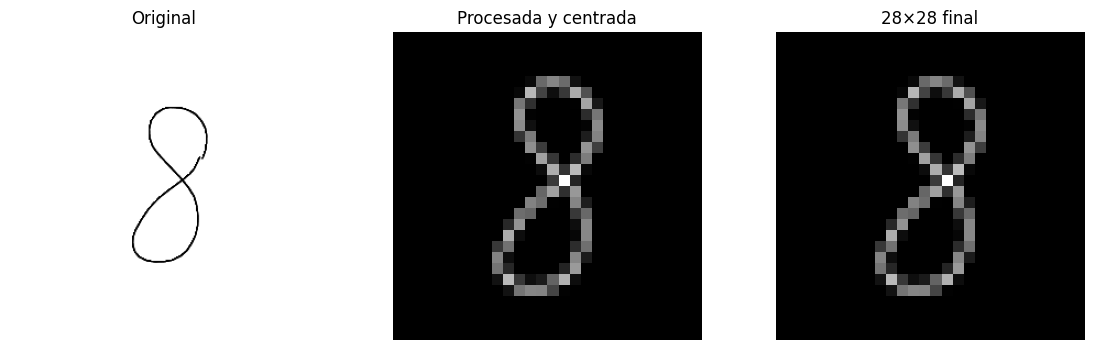


Archivo: 8_4.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.00019
  1   |   0.00227
  2   |   0.00048
  3   |   0.00499
  4   |   0.00019
  5   |   0.00240
  6   |   0.00042
  7   |   0.00011
  8   |   0.98811
  9   |   0.00086


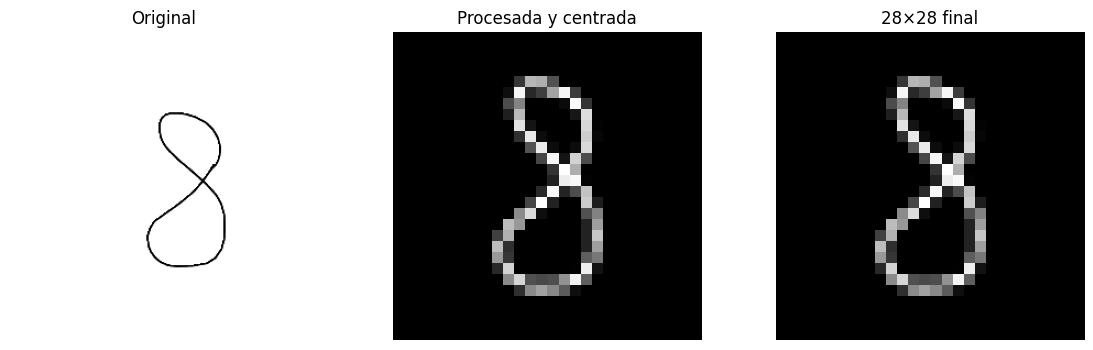


Archivo: 8_5.png
Predicción: 8
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00009
  2   |   0.00004
  3   |   0.00627
  4   |   0.00000
  5   |   0.00014
  6   |   0.00000
  7   |   0.00000
  8   |   0.99345
  9   |   0.00000


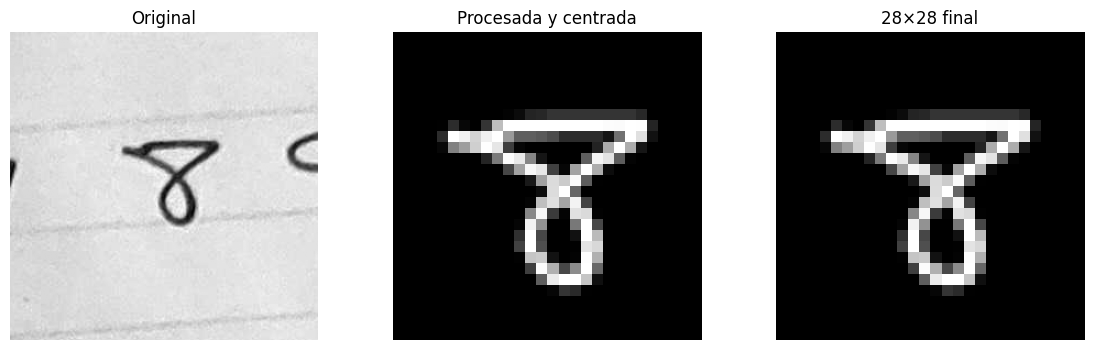


Archivo: 9_0.png
Predicción: 9
Digit | Probability
-------------------
  0   |   0.00064
  1   |   0.00168
  2   |   0.00071
  3   |   0.00604
  4   |   0.02211
  5   |   0.00518
  6   |   0.00016
  7   |   0.00273
  8   |   0.02248
  9   |   0.93828


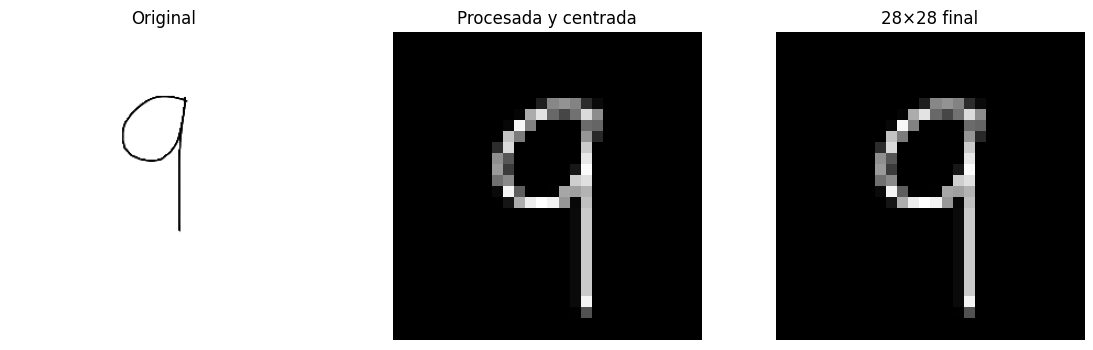


Archivo: 9_1.png
Predicción: 9
Digit | Probability
-------------------
  0   |   0.00007
  1   |   0.00007
  2   |   0.00007
  3   |   0.00040
  4   |   0.01568
  5   |   0.00085
  6   |   0.00001
  7   |   0.00030
  8   |   0.00107
  9   |   0.98150


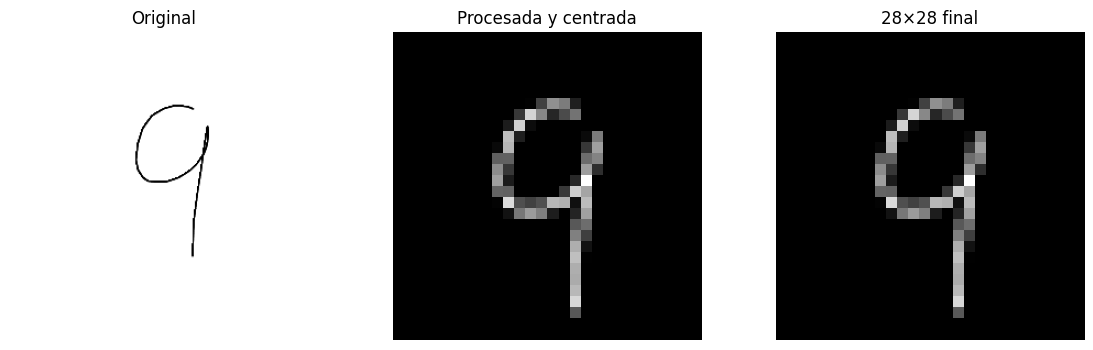


Archivo: 9_2.png
Predicción: 9
Digit | Probability
-------------------
  0   |   0.00082
  1   |   0.00205
  2   |   0.00220
  3   |   0.01485
  4   |   0.01915
  5   |   0.00972
  6   |   0.00041
  7   |   0.00446
  8   |   0.08167
  9   |   0.86467


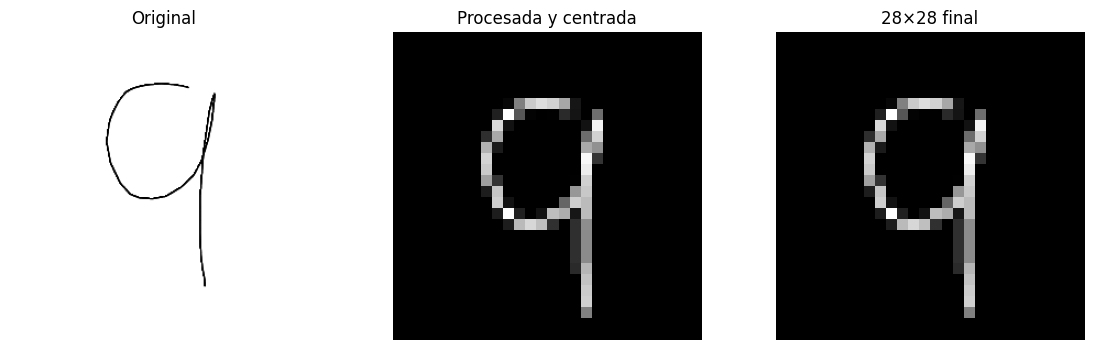


Archivo: 9_3.png
Predicción: 9
Digit | Probability
-------------------
  0   |   0.00021
  1   |   0.00065
  2   |   0.00037
  3   |   0.00580
  4   |   0.02016
  5   |   0.00400
  6   |   0.00006
  7   |   0.00085
  8   |   0.02425
  9   |   0.94364


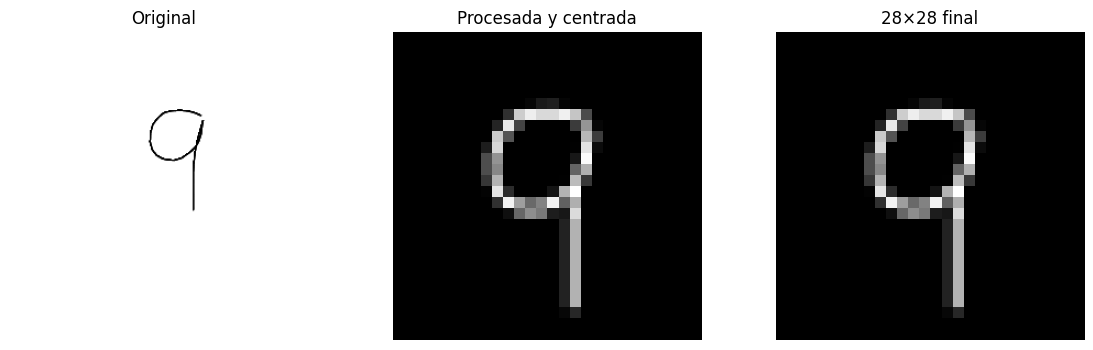


Archivo: 9_4.png
Predicción: 9
Digit | Probability
-------------------
  0   |   0.00005
  1   |   0.00009
  2   |   0.00018
  3   |   0.00049
  4   |   0.01583
  5   |   0.00124
  6   |   0.00001
  7   |   0.00038
  8   |   0.00133
  9   |   0.98040


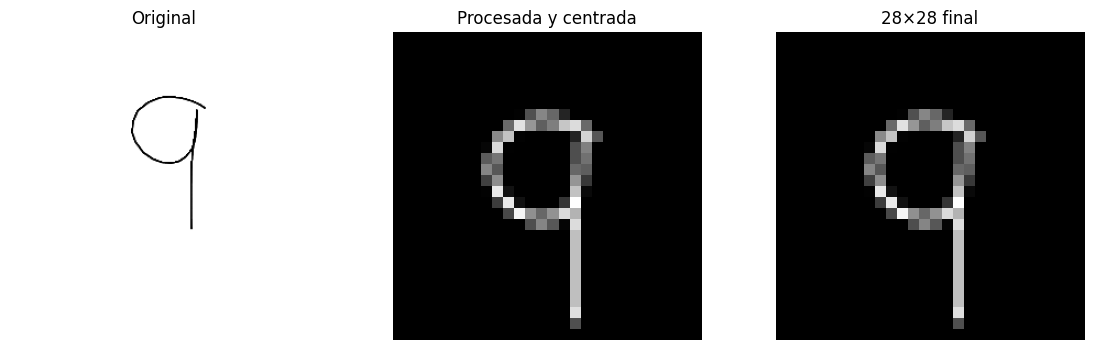


Archivo: 9_5.png
Predicción: 9
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00003
  2   |   0.00000
  3   |   0.00624
  4   |   0.00010
  5   |   0.00131
  6   |   0.00000
  7   |   0.00003
  8   |   0.00432
  9   |   0.98797


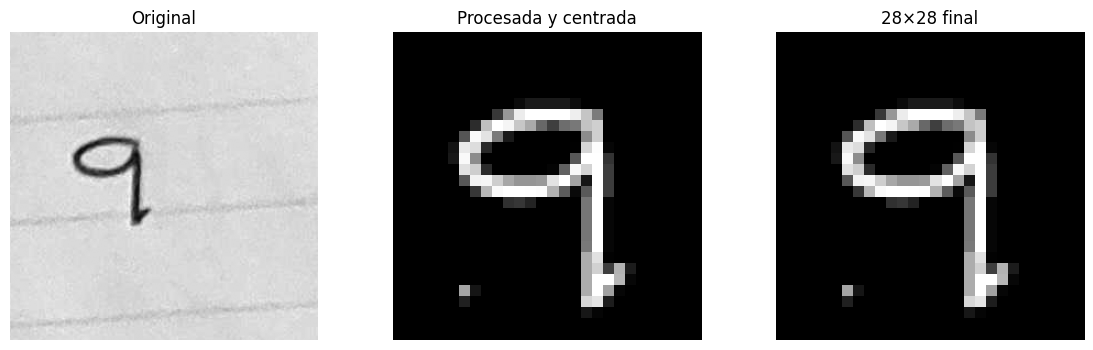

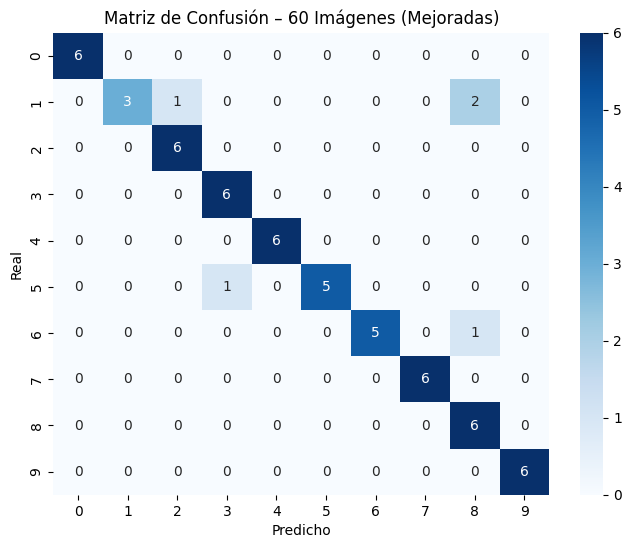


 REPORTE DE CLASIFICACIÓN (Mejorado)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         6
           2       0.86      1.00      0.92         6
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         6
           5       1.00      0.83      0.91         6
           6       1.00      0.83      0.91         6
           7       1.00      1.00      1.00         6
           8       0.67      1.00      0.80         6
           9       1.00      1.00      1.00         6

    accuracy                           0.92        60
   macro avg       0.94      0.92      0.91        60
weighted avg       0.94      0.92      0.91        60


Accuracy total con las 60 imágenes (mejorado): 91.67%

 IMÁGENES MAL CLASIFICADAS
Índice 7: Real = 1, Predicho = 8
Índice 8: Real = 1, Predicho = 2
Índice 9: Real = 1, Predicho = 8
Índice 33: Real = 5, 

In [18]:
def adaptive_binarize(img):
    """
    Binarización adaptativa conservando dígitos delgados
    y evitando grandes zonas de ruido absoluto.
    """
    # Suavizado ligero para no borrar trazos finos
    blur = cv2.GaussianBlur(img, (3,3), 0)

    # Threshold adaptativo con blockSize pequeño
    adap = cv2.adaptiveThreshold(
        blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        21,  # blockSize pequeño, mantiene trazos delgados
        8    # C moderado
    )

    return adap

def preprocess_digit(img, final_size=28, margin=4, return_bbox=False):
    """
    Preprocesa un dígito de la imagen, devolviendo el lienzo 28x28.
    Si return_bbox=True, también devuelve las coordenadas (x, y, w, h) del componente ganador
    en la imagen original.
    """
    # 1) Binarización adaptativa
    thresh = adaptive_binarize(img)

    # 2) Limpieza morfológica
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((2,2), np.uint8))
    clean = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))
    clean = cv2.dilate(clean, np.ones((2,2), np.uint8))

    # 3) Componentes conectadas
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(clean)
    H, W = clean.shape
    center = np.array([W/2, H/2])

    best_label = None
    best_score = -1

    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area < 10:  # ignorar fragmentos pequeños
            continue
        aspect_ratio = w / h
        if aspect_ratio < 0.1 or aspect_ratio > 5:
            continue
        cx, cy = centroids[i]
        dist = np.linalg.norm(np.array([cx, cy]) - center)
        score = area / (dist + 1)
        if score > best_score:
            best_score = score
            best_label = i

    if best_label is None:
        if return_bbox:
            return np.zeros((final_size, final_size), dtype=np.uint8), (0,0,0,0)
        return np.zeros((final_size, final_size), dtype=np.uint8)

    # 4) Bounding box del componente ganador
    x, y, w, h, area = stats[best_label]
    x_orig, y_orig, w_orig, h_orig = x, y, w, h  # guardar bbox original

    x = max(0, x - margin)
    y = max(0, y - margin)
    w = w + 2 * margin
    h = h + 2 * margin

    cropped = clean[y:y+h, x:x+w]

    # 5) Escalado proporcional
    larger_dim = max(w, h)
    scale = (final_size - margin*2) / larger_dim
    new_w = max(1, int(w*scale))
    new_h = max(1, int(h*scale))
    resized = cv2.resize(cropped, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # 6) Colocar en lienzo 28x28
    canvas = np.zeros((final_size, final_size), dtype=np.uint8)
    x_offset = (final_size - new_w) // 2
    y_offset = (final_size - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized

    # 7) Centrado por centroide
    ys, xs = np.nonzero(canvas)
    if len(xs) > 0:
        cx = np.mean(xs)
        cy = np.mean(ys)
        shift_x = int(final_size//2 - cx)
        shift_y = int(final_size//2 - cy)
        M = np.float32([[1,0,shift_x],[0,1,shift_y]])
        canvas = cv2.warpAffine(canvas, M, (final_size, final_size))

    if return_bbox:
        return canvas, (x_orig, y_orig, w_orig, h_orig)
    return canvas

# ======================================================
#   PROBLEMA 3 + 4 CON PREPROCESAMIENTO MEJORADO (P5)
# ======================================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Desactivar advertencias
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# ---------------------------------------------------------
# 1) Ruta donde están las imágenes del usuario
# ---------------------------------------------------------

from google.colab import drive
drive.mount('/content/drive')

num_dir = "/content/drive/MyDrive/ITC 5to Semestre/Inteligencia Artificial/Numeros A3.2"

print("Directorio seleccionado:")
print(num_dir)

# ---------------------------------------------------------
# 2) Crear listas para el Problema 4
# ---------------------------------------------------------
true_labels = []
predicted_labels = []

# ---------------------------------------------------------
# 3) Clasificar las 60 imágenes con el nuevo preprocesamiento
# ---------------------------------------------------------
for digit in range(10):
    for rep in range(6):

        filename = f"{digit}_{rep}.png"
        filepath = os.path.join(num_dir, filename)

        if not os.path.exists(filepath):
            print(f"Warning: No se encontró {filepath}")
            continue

        # Cargar imagen en escala de grises
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"ERROR: No se pudo cargar → {filepath}")
            continue

        # === NUEVO PREPROCESAMIENTO (P5) ===
        processed = preprocess_digit(img)

        # Preparar para la red
        input_img = processed.reshape(1, 28, 28, 1).astype("float32") / 255.0

        # Predicción
        prediction = model.predict(input_img, verbose=0)
        predicted_label = np.argmax(prediction)

        # Guardar resultados
        true_labels.append(digit)
        predicted_labels.append(predicted_label)

        # Mostrar info
        print("\n==============================")
        print(f"Archivo: {filename}")
        print(f"Predicción: {predicted_label}")
        print("Digit | Probability")
        print("-------------------")
        for i, prob in enumerate(prediction[0]):
            print(f"  {i}   |   {prob:.5f}")

        # Mostrar preprocesamiento
        fig, axes = plt.subplots(1, 3, figsize=(14, 4))

        axes[0].imshow(img, cmap='gray')
        axes[0].set_title("Original")
        axes[0].axis('off')

        axes[1].imshow(processed, cmap='gray')
        axes[1].set_title("Procesada y centrada")
        axes[1].axis('off')

        axes[2].imshow(processed, cmap='gray')
        axes[2].set_title("28×28 final")
        axes[2].axis('off')

        plt.show()

# =====================================================
#   PROBLEMA 4 – MATRIZ DE CONFUSIÓN, REPORTE, ACCURACY
# =====================================================

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# ---------------------------
# Matriz de Confusión
# ---------------------------
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.title("Matriz de Confusión – 60 Imágenes (Mejoradas)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# ---------------------------
# Reporte de Clasificación
# ---------------------------
print("\n====================================")
print(" REPORTE DE CLASIFICACIÓN (Mejorado)")
print("====================================")
print(classification_report(true_labels, predicted_labels, zero_division=0))

# ---------------------------
# Exactitud total
# ---------------------------
accuracy = np.mean(true_labels == predicted_labels)
print(f"\nAccuracy total con las 60 imágenes (mejorado): {accuracy*100:.2f}%")

# ---------------------------
# Errores
# ---------------------------
print("\n====================================")
print(" IMÁGENES MAL CLASIFICADAS")
print("====================================")

errors = 0
for i in range(len(true_labels)):
    if true_labels[i] != predicted_labels[i]:
        print(f"Índice {i}: Real = {true_labels[i]}, Predicho = {predicted_labels[i]}")
        errors += 1

print(f"\nTotal de errores: {errors} de 60 imágenes")


Con las mejoras realizadas, podemos ver que los resultados mejoraron mas de 4 veces. Ahora, se tiene una exactitud del 91.67%, y todas las otras metricas tambien mejoraron. Tambien, 3 de los 5 errores fueron con el numero 1. Al ver las imagenes preprocesadas, se puede ver que es porque se esta perdiendo el numero original, y que el mismo problema tambien ocurre parcialmente de vez en cuando con los demas digitos.

Se podria mejorar nuevamente haciendo dinamico las operaciones morphologicas segun la cantidad de pixeles negros y blancos que hay para asegurarnos de no eliminar los numeros con trazos finos y poco ruido, pero por el momento, podemos tomar por hecho que el modelo ya se adecua bastante bien a mas numeros.

El siguiente paso consiste ahora en hacer una prueba en tiempo real, mostrando digitos en la camara y viendo la prediccion que hace el modelo.

Se abrira la camara, y sobre el video, se estaran mostrando 3 cosas.

La primera es los digitos del 0 al 9 y sus respectivas probabilidades. El digito con la mayor probabilidad (es decir el predicho) estara en verde, mientras que los demas en rojo.
Tambien, se vera el binding box que esta siendo aplicado sobre el numero, para poder ver que es lo que se esta recortando.
Por ultimo, se vera en una esquina la imagen ya preprocesada, para poder analizarlas y hacer mas mejoras en un futuro caso de ser necesario.

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

  # JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# start streaming video from webcam
video_stream()
label_html = 'Capturing...'
bbox = ''
count = 0

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for processing
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # preprocess image to find best digit, obteniendo bbox original
    digit_img, bbox_coords = preprocess_digit(gray, return_bbox=True)  # 28x28 binarized
    x, y, w, h = bbox_coords

    # expand dims for model prediction (assuming model expects (1,28,28,1))
    input_img = digit_img.reshape(1, 28, 28, 1).astype('float32') / 255.0

    # predict probabilities without printing
    preds = model.predict(input_img, verbose=0)[0]  # array of 10 probabilities

    # draw bounding box directly using original coordinates
    bbox_array = cv2.rectangle(bbox_array, (x, y), (x+w, y+h), (255,0,0), 2)

    # find index of highest probability
    max_idx = preds.argmax()

    # overlay probabilities of 0-9
    for i, prob in enumerate(preds):
        text = f"{i}: {prob:.2f}"
        color = (0,255,0) if i == max_idx else (255,255,255)  # green for max, white otherwise
        cv2.putText(bbox_array, text, (10, 20 + i*20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1, cv2.LINE_AA)

    # add preprocessed digit image as small overlay in top-right corner
    mini = cv2.resize(digit_img, (200, 200))  # scale up for visibility
    mini_rgb = cv2.cvtColor(mini, cv2.COLOR_GRAY2RGB)
    mini_rgba = cv2.cvtColor(mini_rgb, cv2.COLOR_RGB2RGBA)
    mini_rgba[:,:,3] = 255  # full alpha

    h_m, w_m, _ = mini_rgba.shape
    bbox_array[0:h_m, -w_m:] = mini_rgba  # place in top-right corner

    # set alpha channel for overlay
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255

    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes


<IPython.core.display.Javascript object>

Los resultados finales fueron altamente satisfactorios. A pesar de que en ocaciones se batallaba en que el binding box se ajustara sobre el digito objetivo, y que luego en el video se mostrara adecuadamente el tamaño del binding box, por lo general se pudo "seleccionar" el digito deseado.

Mas aun, en la gran mayoria de las predicciones, estas eran correctas y con una probabilidad cercana, sino igual, a 1. Es decir, el modelo tenia una gran seguridad al momento de predecir incluso con imagenes con ruido en tiempo real, y los predecia correctamente.

Aun asi, es importante considerar que una de las limitaciones del modelo es la simplicidad de las imagenes que puede predecir. Aunque ya son imagenes en un ambiente con mayor ruido, los trazos siguien siendo altamente legibles y no tienen ningun formato especial (como los podrian tener en el internet), por lo que se limita a imagenes de un estilo similar.